## Groupwork Assignment Submission 3: Optimizing 2 and 3 Security Portfolios

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

**Data Importing**

1.1	Import 11 ETFs, which are the Select Spdrs (e.g. XLF, XLE, etc.).  Some of this period did not include the Real Estate sector fund.

ETFs = XLB XLE XLF XLI XLK XLP IYR XLU XLV XLY VOX

We use IYR and VOX instead of the corresponding SPRDs, as these have more data.


In [2]:
with open('spdrs.pkl', 'rb') as f:
    data = pickle.load(f)

2.1	Recall assignment 2, 3 portfolios all combinations (5).

In [3]:
df_return = data['2014-01-02' :'2019-12-31'].sort_index(axis=0 ,ascending=True)

* Creating combinations (11 choose 3):

In [4]:
combs_spdr = list(combinations(df_return, 3))
combs_select_spdr = []

# Put the obtained combinations in a list
for i in (combs_spdr):
    combs_select_spdr.append(i)

* Combinations of 2019 ETF data:

In [5]:
combinations_of_portfolios = []

for j in (range(165)):
    combinations_of_portfolios.append(df_return[list(combs_select_spdr[j])])

* Numbering the portfolios:

In [6]:
portfolio_numbers = []
for number in range(165):
    p_nr = "Portfolio #" + str(number)
    portfolio_numbers.append(p_nr)
portfolio_numbers_df = pd.DataFrame(combs_select_spdr, index=portfolio_numbers,columns=["Asset 1","Asset 2","Asset 3"])

* 2.2	Determine the EF under no constraints as in 4.2 again


We use here pypfopt module. (https://pyportfolioopt.readthedocs.io/en/latest/GeneralEfficientFrontier.html)

In [7]:
no_constraints = []

for j in (range(165)):
    mu_noc = mean_historical_return(combinations_of_portfolios[j])
    S_noc = CovarianceShrinkage(combinations_of_portfolios[j]).ledoit_wolf()
    ef_noc = EfficientFrontier(mu_noc, S_noc, weight_bounds=(-1,1))
    raw_weights = ef_noc.min_volatility()
    print("Weights:", ef_noc.clean_weights())
    ef_noc.portfolio_performance(verbose=True)
    no_constraints.append(ef_noc.portfolio_performance(verbose=True))

Weights: OrderedDict([('XLB', 0.58892), ('XLE', 0.07699), ('XLF', 0.3341)])
Expected annual return: 4.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.16
Expected annual return: 4.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.16
Weights: OrderedDict([('XLB', 0.24918), ('XLE', 0.0326), ('XLI', 0.71822)])
Expected annual return: 6.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.32
Expected annual return: 6.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.32
Weights: OrderedDict([('XLB', 0.50125), ('XLE', 0.07382), ('XLK', 0.42493)])
Expected annual return: 9.4%
Annual volatility: 15.2%
Sharpe Ratio: 0.48
Expected annual return: 9.4%
Annual volatility: 15.2%
Sharpe Ratio: 0.48
Weights: OrderedDict([('XLB', 0.13754), ('XLE', 0.05582), ('XLP', 0.80664)])
Expected annual return: 5.8%
Annual volatility: 11.5%
Sharpe Ratio: 0.33
Expected annual return: 5.8%
Annual volatility: 11.5%
Sharpe Ratio: 0.33
Weights: OrderedDict([('XLB', 0.29283), ('XLE', 0.05947), ('IYR', 0.64771)])
Expected annual return: 5.5%
Annu

Weights: OrderedDict([('XLB', 0.24133), ('XLU', 0.50364), ('VOX', 0.25503)])
Expected annual return: 6.6%
Annual volatility: 11.3%
Sharpe Ratio: 0.40
Expected annual return: 6.6%
Annual volatility: 11.3%
Sharpe Ratio: 0.40
Weights: OrderedDict([('XLB', 0.2095), ('XLV', 0.36569), ('XLY', 0.42481)])
Expected annual return: 9.7%
Annual volatility: 13.6%
Sharpe Ratio: 0.57
Expected annual return: 9.7%
Annual volatility: 13.6%
Sharpe Ratio: 0.57
Weights: OrderedDict([('XLB', 0.22134), ('XLV', 0.38346), ('VOX', 0.3952)])
Expected annual return: 6.1%
Annual volatility: 13.3%
Sharpe Ratio: 0.31
Expected annual return: 6.1%
Annual volatility: 13.3%
Sharpe Ratio: 0.31
Weights: OrderedDict([('XLB', 0.22539), ('XLY', 0.40499), ('VOX', 0.36963)])
Expected annual return: 6.4%
Annual volatility: 13.6%
Sharpe Ratio: 0.33
Expected annual return: 6.4%
Annual volatility: 13.6%
Sharpe Ratio: 0.33
Weights: OrderedDict([('XLE', 0.08054), ('XLF', 0.17267), ('XLI', 0.74679)])
Expected annual return: 6.5%
Annu

Weights: OrderedDict([('XLE', 0.08709), ('XLV', 0.40581), ('XLY', 0.5071)])
Expected annual return: 9.5%
Annual volatility: 13.7%
Sharpe Ratio: 0.55
Expected annual return: 9.5%
Annual volatility: 13.7%
Sharpe Ratio: 0.55
Weights: OrderedDict([('XLE', 0.0836), ('XLV', 0.46263), ('VOX', 0.45376)])
Expected annual return: 5.4%
Annual volatility: 13.5%
Sharpe Ratio: 0.25
Expected annual return: 5.4%
Annual volatility: 13.5%
Sharpe Ratio: 0.25
Weights: OrderedDict([('XLE', 0.07335), ('XLY', 0.52353), ('VOX', 0.40312)])
Expected annual return: 6.3%
Annual volatility: 13.8%
Sharpe Ratio: 0.31
Expected annual return: 6.3%
Annual volatility: 13.8%
Sharpe Ratio: 0.31
Weights: OrderedDict([('XLF', 0.1443), ('XLI', 0.6247), ('XLK', 0.231)])
Expected annual return: 9.8%
Annual volatility: 14.7%
Sharpe Ratio: 0.53
Expected annual return: 9.8%
Annual volatility: 14.7%
Sharpe Ratio: 0.53
Weights: OrderedDict([('XLF', 0.06425), ('XLI', 0.18565), ('XLP', 0.7501)])
Expected annual return: 7.0%
Annual vo

Weights: OrderedDict([('XLI', 0.35805), ('IYR', 0.23711), ('XLU', 0.40484)])
Expected annual return: 8.3%
Annual volatility: 11.3%
Sharpe Ratio: 0.56
Expected annual return: 8.3%
Annual volatility: 11.3%
Sharpe Ratio: 0.56
Weights: OrderedDict([('XLI', 0.26587), ('IYR', 0.51917), ('XLV', 0.21495)])
Expected annual return: 7.9%
Annual volatility: 12.1%
Sharpe Ratio: 0.49
Expected annual return: 7.9%
Annual volatility: 12.1%
Sharpe Ratio: 0.49
Weights: OrderedDict([('XLI', 0.25032), ('IYR', 0.53466), ('XLY', 0.21503)])
Expected annual return: 8.0%
Annual volatility: 12.2%
Sharpe Ratio: 0.49
Expected annual return: 8.0%
Annual volatility: 12.2%
Sharpe Ratio: 0.49
Weights: OrderedDict([('XLI', 0.27558), ('IYR', 0.50853), ('VOX', 0.2159)])
Expected annual return: 6.1%
Annual volatility: 12.0%
Sharpe Ratio: 0.34
Expected annual return: 6.1%
Annual volatility: 12.0%
Sharpe Ratio: 0.34
Weights: OrderedDict([('XLI', 0.30724), ('XLU', 0.49533), ('XLV', 0.19744)])
Expected annual return: 9.3%
Ann

Expected annual return: 6.9%
Annual volatility: 12.1%
Sharpe Ratio: 0.41
Weights: OrderedDict([('XLU', 0.49002), ('XLV', 0.17406), ('XLY', 0.33592)])
Expected annual return: 10.3%
Annual volatility: 11.2%
Sharpe Ratio: 0.74
Expected annual return: 10.3%
Annual volatility: 11.2%
Sharpe Ratio: 0.74
Weights: OrderedDict([('XLU', 0.47277), ('XLV', 0.26011), ('VOX', 0.26712)])
Expected annual return: 7.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.52
Expected annual return: 7.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.52
Weights: OrderedDict([('XLU', 0.49049), ('XLY', 0.3313), ('VOX', 0.17821)])
Expected annual return: 8.8%
Annual volatility: 11.2%
Sharpe Ratio: 0.60
Expected annual return: 8.8%
Annual volatility: 11.2%
Sharpe Ratio: 0.60
Weights: OrderedDict([('XLV', 0.34479), ('XLY', 0.31261), ('VOX', 0.34261)])
Expected annual return: 7.9%
Annual volatility: 13.3%
Sharpe Ratio: 0.45
Expected annual return: 7.9%
Annual volatility: 13.3%
Sharpe Ratio: 0.45


* Sorting the portfolios based on max Sharpe Ratio:

In [8]:
no_constraints_pd = pd.DataFrame(no_constraints, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:", "Annual volatility %:", "Sharpe Ratio:"])
no_constraints_pd.sort_values(by=["Sharpe Ratio:"], ascending=False)

Expected annual return %:  Annual volatility %:  \
(XLK, XLU, XLV)                   0.113283              0.116095   
(XLK, IYR, XLU)                   0.107591              0.116649   
(XLU, XLV, XLY)                   0.103200              0.112169   
(XLK, XLU, XLY)                   0.103734              0.113893   
(XLF, XLK, XLU)                   0.101353              0.115334   
...                                    ...                   ...   
(XLB, XLE, XLF)                   0.044782              0.154816   
(XLE, IYR, VOX)                   0.039475              0.123274   
(XLB, XLF, VOX)                   0.036962              0.139026   
(XLB, XLE, VOX)                   0.032069              0.141201   
(XLE, XLF, VOX)                   0.022234              0.143228   

                 Sharpe Ratio:  
(XLK, XLU, XLV)       0.803512  
(XLK, IYR, XLU)       0.750894  
(XLU, XLV, XLY)       0.741743  
(XLK, XLU, XLY)       0.735203  
(XLF, XLK, XLU)       0.705371  
...                        ...  
(XLB, XLE, XLF)       0.160076  
(XLE, IYR, VOX)       0.157983  
(XLB, XLF, VOX)       0.122009  
(XLB, XLE, VOX)       0.085476  
(XLE, XLF, VOX)       0.015594  

[165 rows x 3 columns]

2.3	Determine the EF under long only constraints

In [9]:
long_constraints = []

for j in (range(165)):
    mu_long = mean_historical_return(combinations_of_portfolios[j])
    S_long = CovarianceShrinkage(combinations_of_portfolios[j]).ledoit_wolf()
    ef_long = EfficientFrontier(mu_long, S_long, weight_bounds=(0,1))
    raw_weights = ef_long.min_volatility()
    print("Weights:", ef_long.clean_weights())
    ef_long.portfolio_performance(verbose=True)
    long_constraints.append(ef_long.portfolio_performance(verbose=True))

Weights: OrderedDict([('XLB', 0.58892), ('XLE', 0.07699), ('XLF', 0.3341)])
Expected annual return: 4.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.16
Expected annual return: 4.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.16
Weights: OrderedDict([('XLB', 0.24918), ('XLE', 0.0326), ('XLI', 0.71822)])
Expected annual return: 6.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.32
Expected annual return: 6.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.32
Weights: OrderedDict([('XLB', 0.50125), ('XLE', 0.07382), ('XLK', 0.42493)])
Expected annual return: 9.4%
Annual volatility: 15.2%
Sharpe Ratio: 0.48
Expected annual return: 9.4%
Annual volatility: 15.2%
Sharpe Ratio: 0.48
Weights: OrderedDict([('XLB', 0.13754), ('XLE', 0.05582), ('XLP', 0.80664)])
Expected annual return: 5.8%
Annual volatility: 11.5%
Sharpe Ratio: 0.33
Expected annual return: 5.8%
Annual volatility: 11.5%
Sharpe Ratio: 0.33
Weights: OrderedDict([('XLB', 0.29283), ('XLE', 0.05947), ('IYR', 0.64771)])
Expected annual return: 5.5%
Annu

Sharpe Ratio: 0.45
Weights: OrderedDict([('XLB', 0.17586), ('IYR', 0.54355), ('XLY', 0.28059)])
Expected annual return: 7.7%
Annual volatility: 12.2%
Sharpe Ratio: 0.46
Expected annual return: 7.7%
Annual volatility: 12.2%
Sharpe Ratio: 0.46
Weights: OrderedDict([('XLB', 0.21354), ('IYR', 0.53269), ('VOX', 0.25378)])
Expected annual return: 5.2%
Annual volatility: 12.1%
Sharpe Ratio: 0.26
Expected annual return: 5.2%
Annual volatility: 12.1%
Sharpe Ratio: 0.26
Weights: OrderedDict([('XLB', 0.24315), ('XLU', 0.5089), ('XLV', 0.24796)])
Expected annual return: 8.8%
Annual volatility: 11.4%
Sharpe Ratio: 0.59
Expected annual return: 8.8%
Annual volatility: 11.4%
Sharpe Ratio: 0.59
Weights: OrderedDict([('XLB', 0.15764), ('XLU', 0.5088), ('XLY', 0.33356)])
Expected annual return: 9.4%
Annual volatility: 11.2%
Sharpe Ratio: 0.66
Expected annual return: 9.4%
Annual volatility: 11.2%
Sharpe Ratio: 0.66
Weights: OrderedDict([('XLB', 0.24133), ('XLU', 0.50364), ('VOX', 0.25503)])
Expected annua

Weights: OrderedDict([('XLE', 0.10554), ('IYR', 0.58345), ('VOX', 0.31101)])
Expected annual return: 3.9%
Annual volatility: 12.3%
Sharpe Ratio: 0.16
Expected annual return: 3.9%
Annual volatility: 12.3%
Sharpe Ratio: 0.16
Weights: OrderedDict([('XLE', 0.12242), ('XLU', 0.53477), ('XLV', 0.34281)])
Expected annual return: 8.1%
Annual volatility: 11.6%
Sharpe Ratio: 0.52
Expected annual return: 8.1%
Annual volatility: 11.6%
Sharpe Ratio: 0.52
Weights: OrderedDict([('XLE', 0.06328), ('XLU', 0.52239), ('XLY', 0.41433)])
Expected annual return: 9.2%
Annual volatility: 11.4%
Sharpe Ratio: 0.64
Expected annual return: 9.2%
Annual volatility: 11.4%
Sharpe Ratio: 0.64
Weights: OrderedDict([('XLE', 0.11146), ('XLU', 0.54081), ('VOX', 0.34773)])
Expected annual return: 5.2%
Annual volatility: 11.7%
Sharpe Ratio: 0.28
Expected annual return: 5.2%
Annual volatility: 11.7%
Sharpe Ratio: 0.28
Weights: OrderedDict([('XLE', 0.08709), ('XLV', 0.40581), ('XLY', 0.5071)])
Expected annual return: 9.5%
Ann

Expected annual return: 7.6%
Annual volatility: 12.3%
Sharpe Ratio: 0.46
Weights: OrderedDict([('XLI', 0.37519), ('XLK', 0.08847), ('XLU', 0.53633)])
Expected annual return: 9.6%
Annual volatility: 11.5%
Sharpe Ratio: 0.67
Expected annual return: 9.6%
Annual volatility: 11.5%
Sharpe Ratio: 0.67
Weights: OrderedDict([('XLI', 0.48782), ('XLK', 0.06833), ('XLV', 0.44385)])
Expected annual return: 9.8%
Annual volatility: 13.9%
Sharpe Ratio: 0.56
Expected annual return: 9.8%
Annual volatility: 13.9%
Sharpe Ratio: 0.56
Weights: OrderedDict([('XLI', 0.44626), ('XLK', 0.0), ('XLY', 0.55374)])
Expected annual return: 9.7%
Annual volatility: 14.1%
Sharpe Ratio: 0.55
Expected annual return: 9.7%
Annual volatility: 14.1%
Sharpe Ratio: 0.55
Weights: OrderedDict([('XLI', 0.51419), ('XLK', 0.02528), ('VOX', 0.46054)])
Expected annual return: 5.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.25
Expected annual return: 5.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.25
Weights: OrderedDict([('XLI', 0.15953),

Weights: OrderedDict([('IYR', 0.19478), ('XLU', 0.42271), ('XLY', 0.38251)])
Expected annual return: 9.6%
Annual volatility: 11.2%
Sharpe Ratio: 0.68
Expected annual return: 9.6%
Annual volatility: 11.2%
Sharpe Ratio: 0.68
Weights: OrderedDict([('IYR', 0.27428), ('XLU', 0.39961), ('VOX', 0.32611)])
Expected annual return: 6.4%
Annual volatility: 11.5%
Sharpe Ratio: 0.38
Expected annual return: 6.4%
Annual volatility: 11.5%
Sharpe Ratio: 0.38
Weights: OrderedDict([('IYR', 0.51127), ('XLV', 0.22651), ('XLY', 0.26222)])
Expected annual return: 8.8%
Annual volatility: 12.1%
Sharpe Ratio: 0.56
Expected annual return: 8.8%
Annual volatility: 12.1%
Sharpe Ratio: 0.56
Weights: OrderedDict([('IYR', 0.49005), ('XLV', 0.26007), ('VOX', 0.24988)])
Expected annual return: 6.6%
Annual volatility: 12.0%
Sharpe Ratio: 0.39
Expected annual return: 6.6%
Annual volatility: 12.0%
Sharpe Ratio: 0.39
Weights: OrderedDict([('IYR', 0.51242), ('XLY', 0.26983), ('VOX', 0.21775)])
Expected annual return: 6.9%
An

* Sorting the portfolios based on max Sharpe Ratio:

In [10]:
long_constraints_pd = pd.DataFrame(long_constraints, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:", "Annual volatility %:", "Sharpe Ratio:"])
long_constraints_pd.sort_values(by=["Sharpe Ratio:"], ascending=False)

Expected annual return %:  Annual volatility %:  \
(XLK, XLU, XLV)                   0.113283              0.116095   
(XLK, IYR, XLU)                   0.107591              0.116649   
(XLU, XLV, XLY)                   0.103200              0.112169   
(XLK, XLU, XLY)                   0.103734              0.113893   
(XLF, XLK, XLU)                   0.101353              0.115334   
...                                    ...                   ...   
(XLB, XLE, XLF)                   0.044782              0.154816   
(XLE, IYR, VOX)                   0.039475              0.123274   
(XLB, XLF, VOX)                   0.036962              0.139026   
(XLB, XLE, VOX)                   0.032069              0.141201   
(XLE, XLF, VOX)                   0.022234              0.143228   

                 Sharpe Ratio:  
(XLK, XLU, XLV)       0.803512  
(XLK, IYR, XLU)       0.750894  
(XLU, XLV, XLY)       0.741743  
(XLK, XLU, XLY)       0.735203  
(XLF, XLK, XLU)       0.705371  
...                        ...  
(XLB, XLE, XLF)       0.160076  
(XLE, IYR, VOX)       0.157983  
(XLB, XLF, VOX)       0.122009  
(XLB, XLE, VOX)       0.085476  
(XLE, XLF, VOX)       0.015594  

[165 rows x 3 columns]

2.4	Determine the EF under box constraints of minimum weight of 10%, and maximum weight of 40%.  (The later limit concentration risk)

In [11]:
box_constraints = []

box_weights = []
for j in (range(165)):
    mu_box = mean_historical_return(combinations_of_portfolios[j])
    S_box = CovarianceShrinkage(combinations_of_portfolios[j]).ledoit_wolf()
    ef_box = EfficientFrontier(mu_box, S_box, weight_bounds=(0.1,0.4))
    raw_weights = ef_box.min_volatility()
    print("Weights:", ef_box.clean_weights())
    ef_box.portfolio_performance(verbose=True)
    box_weights.append(ef_box.clean_weights())
    box_constraints.append(ef_box.portfolio_performance(verbose=True))

Weights: OrderedDict([('XLB', 0.4), ('XLE', 0.2), ('XLF', 0.4)])
Expected annual return: 3.2%
Annual volatility: 15.6%
Sharpe Ratio: 0.08
Expected annual return: 3.2%
Annual volatility: 15.6%
Sharpe Ratio: 0.08
Weights: OrderedDict([('XLB', 0.4), ('XLE', 0.2), ('XLI', 0.4)])
Expected annual return: 4.0%
Annual volatility: 15.2%
Sharpe Ratio: 0.13
Expected annual return: 4.0%
Annual volatility: 15.2%
Sharpe Ratio: 0.13
Weights: OrderedDict([('XLB', 0.4), ('XLE', 0.2), ('XLK', 0.4)])
Expected annual return: 7.7%
Annual volatility: 15.4%
Sharpe Ratio: 0.37
Expected annual return: 7.7%
Annual volatility: 15.4%
Sharpe Ratio: 0.37
Weights: OrderedDict([('XLB', 0.4), ('XLE', 0.2), ('XLP', 0.4)])
Expected annual return: 3.5%
Annual volatility: 13.0%
Sharpe Ratio: 0.12
Expected annual return: 3.5%
Annual volatility: 13.0%
Sharpe Ratio: 0.12
Weights: OrderedDict([('XLB', 0.4), ('XLE', 0.2), ('IYR', 0.4)])
Expected annual return: 3.5%
Annual volatility: 13.2%
Sharpe Ratio: 0.11
Expected annual re

Weights: OrderedDict([('XLB', 0.28269), ('XLU', 0.4), ('XLV', 0.31731)])
Expected annual return: 8.7%
Annual volatility: 11.5%
Sharpe Ratio: 0.58
Expected annual return: 8.7%
Annual volatility: 11.5%
Sharpe Ratio: 0.58
Weights: OrderedDict([('XLB', 0.2), ('XLU', 0.4), ('XLY', 0.4)])
Expected annual return: 9.3%
Annual volatility: 11.4%
Sharpe Ratio: 0.64
Expected annual return: 9.3%
Annual volatility: 11.4%
Sharpe Ratio: 0.64
Weights: OrderedDict([('XLB', 0.28054), ('XLU', 0.4), ('VOX', 0.31946)])
Expected annual return: 5.9%
Annual volatility: 11.5%
Sharpe Ratio: 0.34
Expected annual return: 5.9%
Annual volatility: 11.5%
Sharpe Ratio: 0.34
Weights: OrderedDict([('XLB', 0.22219), ('XLV', 0.37781), ('XLY', 0.4)])
Expected annual return: 9.7%
Annual volatility: 13.6%
Sharpe Ratio: 0.56
Expected annual return: 9.7%
Annual volatility: 13.6%
Sharpe Ratio: 0.56
Weights: OrderedDict([('XLB', 0.22134), ('XLV', 0.38346), ('VOX', 0.3952)])
Expected annual return: 6.1%
Annual volatility: 13.3%
Sh

Sharpe Ratio: 0.40
Expected annual return: 7.6%
Annual volatility: 13.9%
Sharpe Ratio: 0.40
Weights: OrderedDict([('XLE', 0.2), ('XLV', 0.4), ('VOX', 0.4)])
Expected annual return: 3.9%
Annual volatility: 13.7%
Sharpe Ratio: 0.14
Expected annual return: 3.9%
Annual volatility: 13.7%
Sharpe Ratio: 0.14
Weights: OrderedDict([('XLE', 0.2), ('XLY', 0.4), ('VOX', 0.4)])
Expected annual return: 4.1%
Annual volatility: 14.0%
Sharpe Ratio: 0.15
Expected annual return: 4.1%
Annual volatility: 14.0%
Sharpe Ratio: 0.15
Weights: OrderedDict([('XLF', 0.23959), ('XLI', 0.4), ('XLK', 0.36041)])
Expected annual return: 10.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.60
Expected annual return: 10.8%
Annual volatility: 14.8%
Sharpe Ratio: 0.60
Weights: OrderedDict([('XLF', 0.2), ('XLI', 0.4), ('XLP', 0.4)])
Expected annual return: 7.1%
Annual volatility: 12.4%
Sharpe Ratio: 0.41
Expected annual return: 7.1%
Annual volatility: 12.4%
Sharpe Ratio: 0.41
Weights: OrderedDict([('XLF', 0.2), ('XLI', 0.4), ('IY

Expected annual return: 8.3%
Annual volatility: 11.9%
Sharpe Ratio: 0.53
Weights: OrderedDict([('XLI', 0.27188), ('XLP', 0.4), ('XLY', 0.32812)])
Expected annual return: 8.6%
Annual volatility: 12.0%
Sharpe Ratio: 0.54
Expected annual return: 8.6%
Annual volatility: 12.0%
Sharpe Ratio: 0.54
Weights: OrderedDict([('XLI', 0.29986), ('XLP', 0.4), ('VOX', 0.30014)])
Expected annual return: 5.7%
Annual volatility: 11.8%
Sharpe Ratio: 0.32
Expected annual return: 5.7%
Annual volatility: 11.8%
Sharpe Ratio: 0.32
Weights: OrderedDict([('XLI', 0.35866), ('IYR', 0.24134), ('XLU', 0.4)])
Expected annual return: 8.3%
Annual volatility: 11.3%
Sharpe Ratio: 0.56
Expected annual return: 8.3%
Annual volatility: 11.3%
Sharpe Ratio: 0.56
Weights: OrderedDict([('XLI', 0.32737), ('IYR', 0.4), ('XLV', 0.27263)])
Expected annual return: 8.2%
Annual volatility: 12.2%
Sharpe Ratio: 0.51
Expected annual return: 8.2%
Annual volatility: 12.2%
Sharpe Ratio: 0.51
Weights: OrderedDict([('XLI', 0.29972), ('IYR', 0.4

Expected annual return: 6.4%
Annual volatility: 11.5%
Sharpe Ratio: 0.38
Weights: OrderedDict([('IYR', 0.4), ('XLV', 0.2708), ('XLY', 0.3292)])
Expected annual return: 9.3%
Annual volatility: 12.2%
Sharpe Ratio: 0.60
Expected annual return: 9.3%
Annual volatility: 12.2%
Sharpe Ratio: 0.60
Weights: OrderedDict([('IYR', 0.4), ('XLV', 0.30417), ('VOX', 0.29583)])
Expected annual return: 6.6%
Annual volatility: 12.1%
Sharpe Ratio: 0.38
Expected annual return: 6.6%
Annual volatility: 12.1%
Sharpe Ratio: 0.38
Weights: OrderedDict([('IYR', 0.4), ('XLY', 0.33591), ('VOX', 0.26409)])
Expected annual return: 7.0%
Annual volatility: 12.2%
Sharpe Ratio: 0.41
Expected annual return: 7.0%
Annual volatility: 12.2%
Sharpe Ratio: 0.41
Weights: OrderedDict([('XLU', 0.4), ('XLV', 0.22124), ('XLY', 0.37876)])
Expected annual return: 10.4%
Annual volatility: 11.3%
Sharpe Ratio: 0.75
Expected annual return: 10.4%
Annual volatility: 11.3%
Sharpe Ratio: 0.75
Weights: OrderedDict([('XLU', 0.4), ('XLV', 0.29705

* Sorting the portfolios based on max Sharpe Ratio:

In [12]:
box_constraints_pd = pd.DataFrame(box_constraints, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:", "Annual volatility %:", "Sharpe Ratio:"])
box_constraints_pd.sort_values(by=["Sharpe Ratio:"], ascending=False)

Expected annual return %:  Annual volatility %:  \
(XLK, XLU, XLY)                   0.117409              0.117202   
(XLK, XLU, XLV)                   0.117648              0.118153   
(XLU, XLV, XLY)                   0.104467              0.113135   
(XLK, IYR, XLU)                   0.106989              0.116712   
(XLF, XLK, XLU)                   0.108587              0.119565   
...                                    ...                   ...   
(XLE, XLI, VOX)                   0.028096              0.140866   
(XLE, XLP, VOX)                   0.023536              0.122730   
(XLE, IYR, VOX)                   0.023261              0.126547   
(XLE, XLF, VOX)                   0.020211              0.146327   
(XLB, XLE, VOX)                   0.016311              0.144942   

                 Sharpe Ratio:  
(XLK, XLU, XLY)       0.831125  
(XLK, XLU, XLV)       0.826451  
(XLU, XLV, XLY)       0.746605  
(XLK, IYR, XLU)       0.745330  
(XLF, XLK, XLU)       0.740910  
...                        ...  
(XLE, XLI, VOX)       0.057476  
(XLE, XLP, VOX)       0.028811  
(XLE, IYR, VOX)       0.025773  
(XLE, XLF, VOX)       0.001444  
(XLB, XLE, VOX)      -0.025452  

[165 rows x 3 columns]

* Graphing all the efficient frontiers per portfoli on 1 Plot:

             Asset 1 Asset 2 Asset 3
Portfolio #0     XLB     XLE     XLF


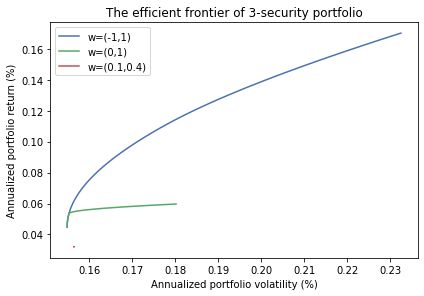

             Asset 1 Asset 2 Asset 3
Portfolio #1     XLB     XLE     XLI


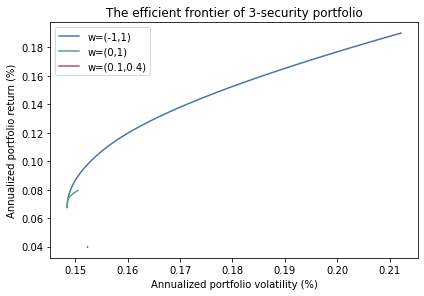

             Asset 1 Asset 2 Asset 3
Portfolio #2     XLB     XLE     XLK


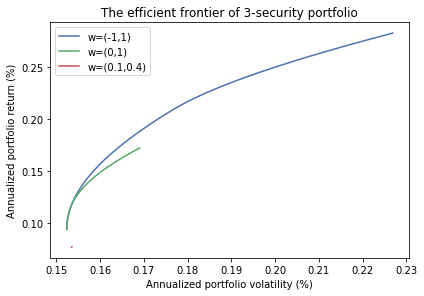

             Asset 1 Asset 2 Asset 3
Portfolio #3     XLB     XLE     XLP


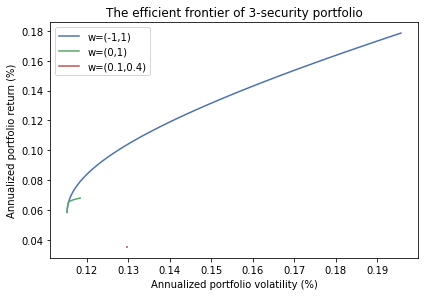

             Asset 1 Asset 2 Asset 3
Portfolio #4     XLB     XLE     IYR


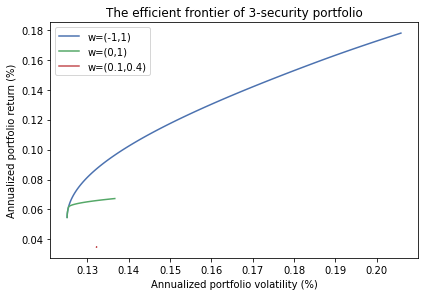

             Asset 1 Asset 2 Asset 3
Portfolio #5     XLB     XLE     XLU


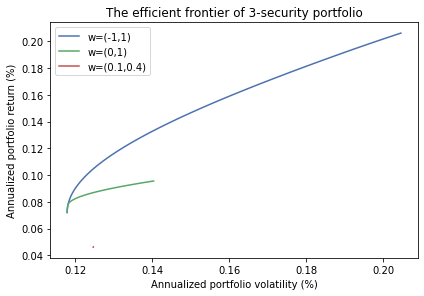

             Asset 1 Asset 2 Asset 3
Portfolio #6     XLB     XLE     XLV


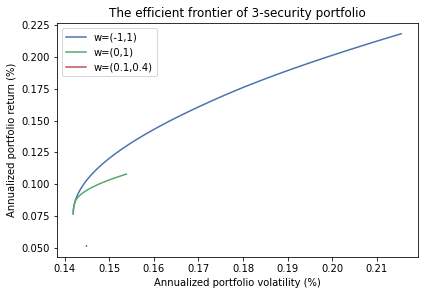

             Asset 1 Asset 2 Asset 3
Portfolio #7     XLB     XLE     XLY


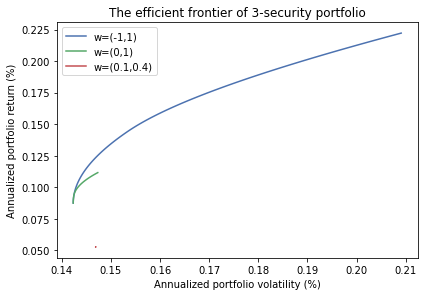

             Asset 1 Asset 2 Asset 3
Portfolio #8     XLB     XLE     VOX


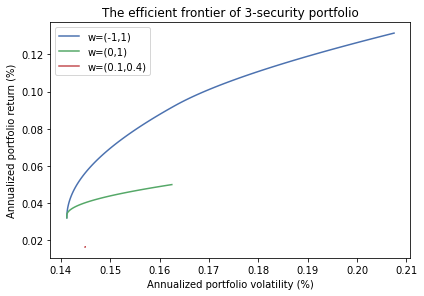

             Asset 1 Asset 2 Asset 3
Portfolio #9     XLB     XLF     XLI


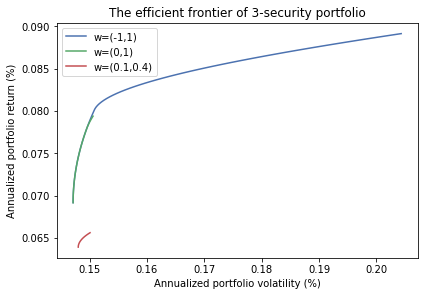

              Asset 1 Asset 2 Asset 3
Portfolio #10     XLB     XLF     XLK


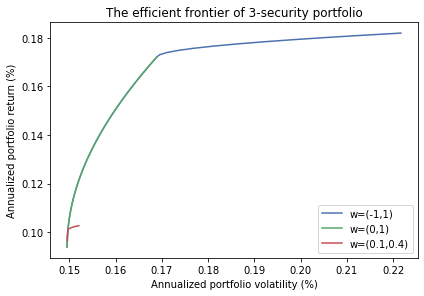

              Asset 1 Asset 2 Asset 3
Portfolio #11     XLB     XLF     XLP


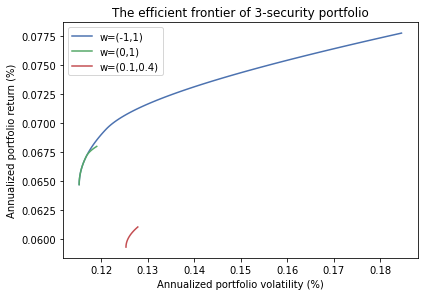

              Asset 1 Asset 2 Asset 3
Portfolio #12     XLB     XLF     IYR


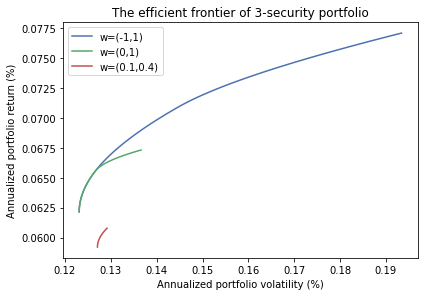

              Asset 1 Asset 2 Asset 3
Portfolio #13     XLB     XLF     XLU


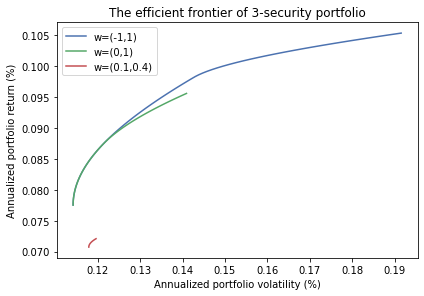

              Asset 1 Asset 2 Asset 3
Portfolio #14     XLB     XLF     XLV


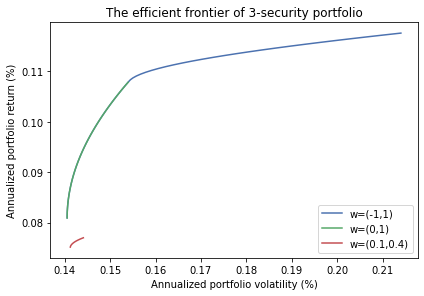

              Asset 1 Asset 2 Asset 3
Portfolio #15     XLB     XLF     XLY


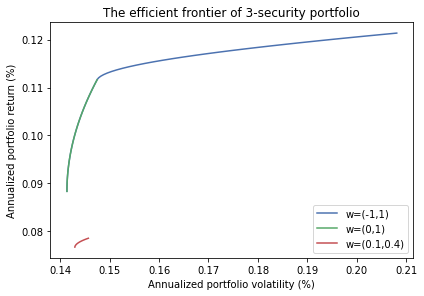

              Asset 1 Asset 2 Asset 3
Portfolio #16     XLB     XLF     VOX


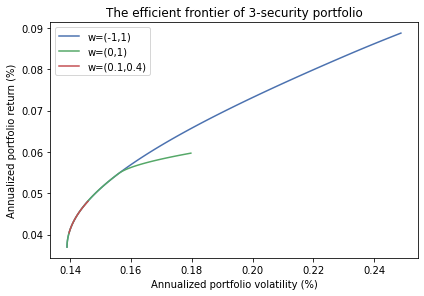

              Asset 1 Asset 2 Asset 3
Portfolio #17     XLB     XLI     XLK


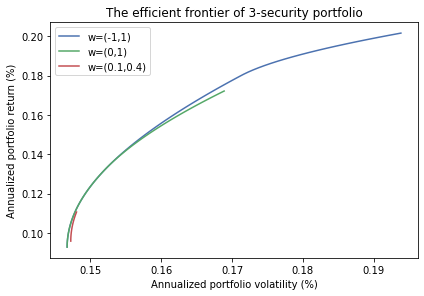

              Asset 1 Asset 2 Asset 3
Portfolio #18     XLB     XLI     XLP


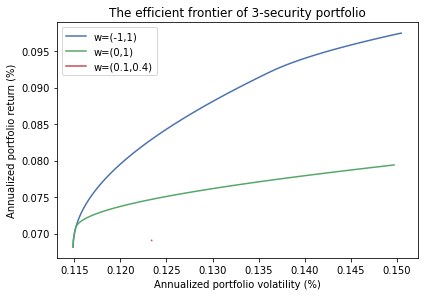

              Asset 1 Asset 2 Asset 3
Portfolio #19     XLB     XLI     IYR


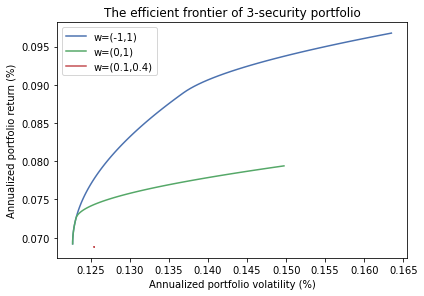

              Asset 1 Asset 2 Asset 3
Portfolio #20     XLB     XLI     XLU


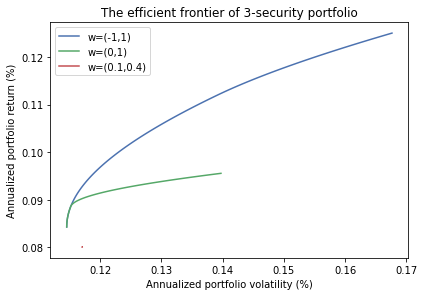

              Asset 1 Asset 2 Asset 3
Portfolio #21     XLB     XLI     XLV


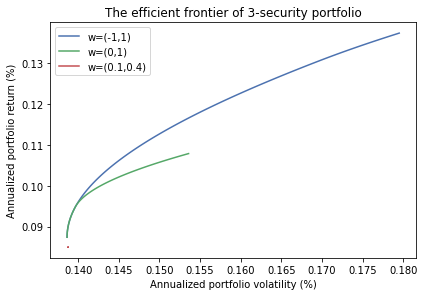

              Asset 1 Asset 2 Asset 3
Portfolio #22     XLB     XLI     XLY


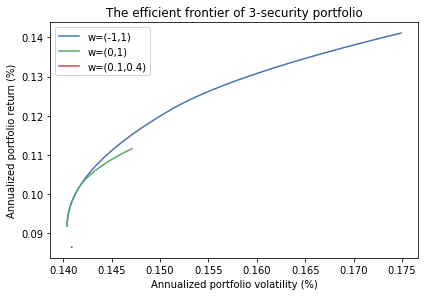

              Asset 1 Asset 2 Asset 3
Portfolio #23     XLB     XLI     VOX


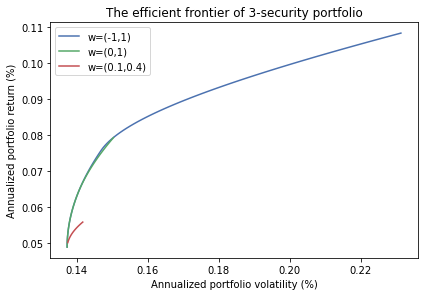

              Asset 1 Asset 2 Asset 3
Portfolio #24     XLB     XLK     XLP


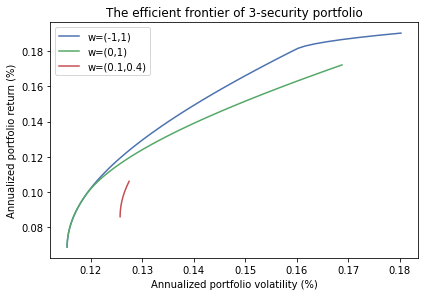

              Asset 1 Asset 2 Asset 3
Portfolio #25     XLB     XLK     IYR


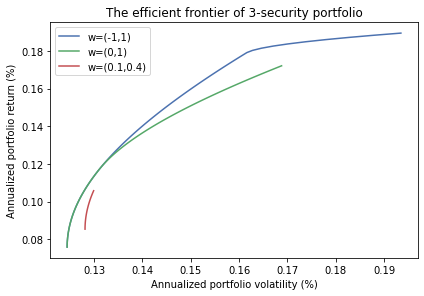

              Asset 1 Asset 2 Asset 3
Portfolio #26     XLB     XLK     XLU


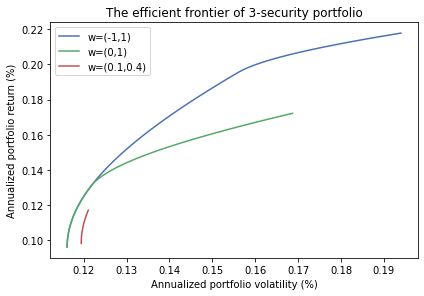

              Asset 1 Asset 2 Asset 3
Portfolio #27     XLB     XLK     XLV


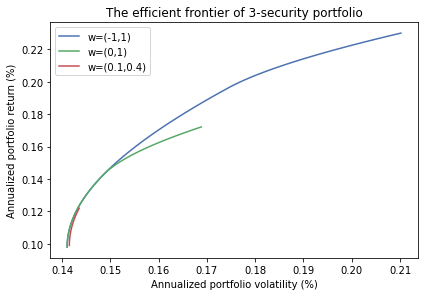

              Asset 1 Asset 2 Asset 3
Portfolio #28     XLB     XLK     XLY


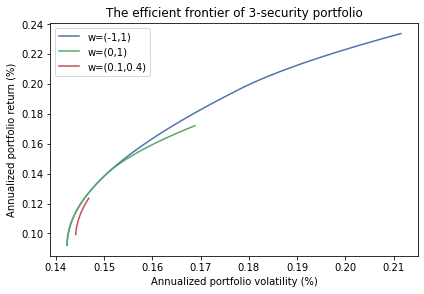

              Asset 1 Asset 2 Asset 3
Portfolio #29     XLB     XLK     VOX


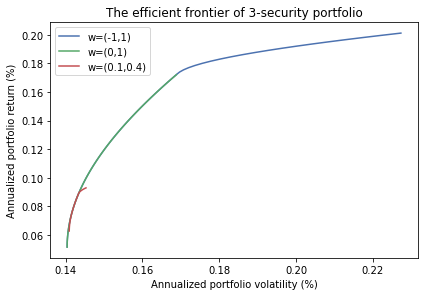

              Asset 1 Asset 2 Asset 3
Portfolio #30     XLB     XLP     IYR


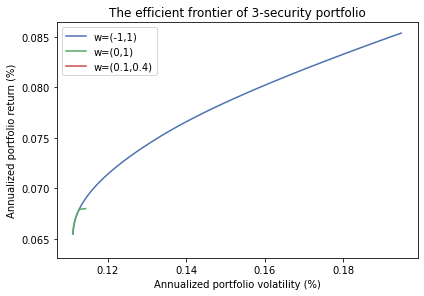

              Asset 1 Asset 2 Asset 3
Portfolio #31     XLB     XLP     XLU


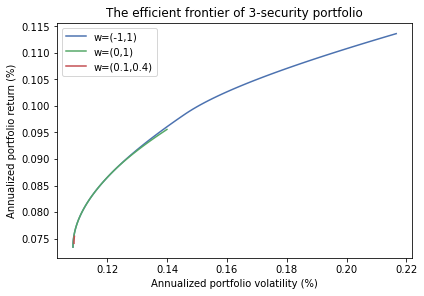

              Asset 1 Asset 2 Asset 3
Portfolio #32     XLB     XLP     XLV


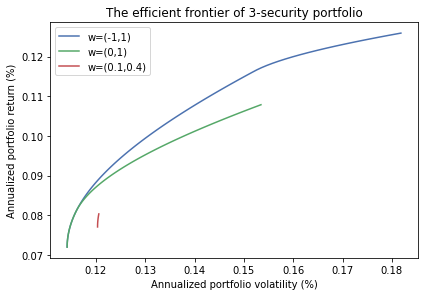

              Asset 1 Asset 2 Asset 3
Portfolio #33     XLB     XLP     XLY


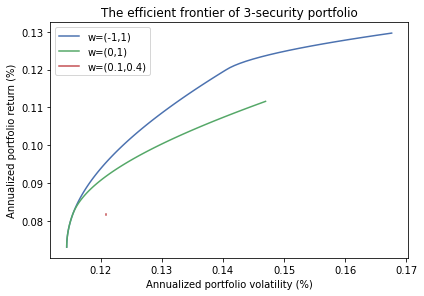

              Asset 1 Asset 2 Asset 3
Portfolio #34     XLB     XLP     VOX


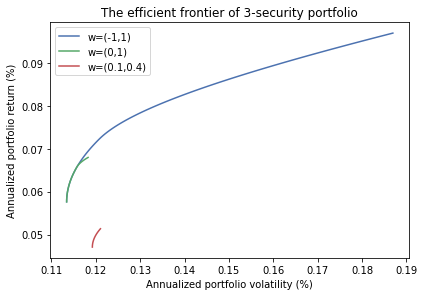

              Asset 1 Asset 2 Asset 3
Portfolio #35     XLB     IYR     XLU


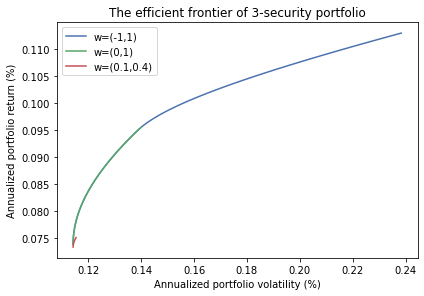

              Asset 1 Asset 2 Asset 3
Portfolio #36     XLB     IYR     XLV


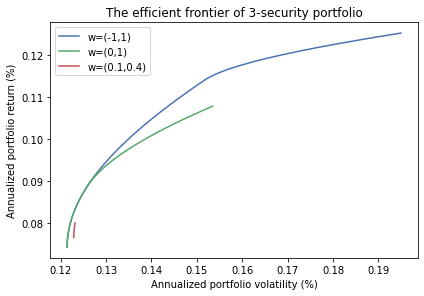

              Asset 1 Asset 2 Asset 3
Portfolio #37     XLB     IYR     XLY


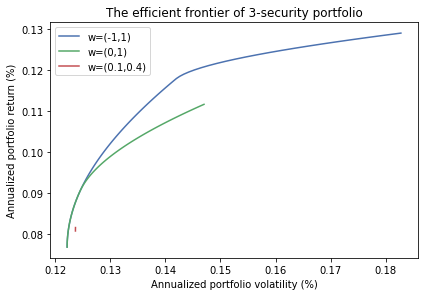

              Asset 1 Asset 2 Asset 3
Portfolio #38     XLB     IYR     VOX


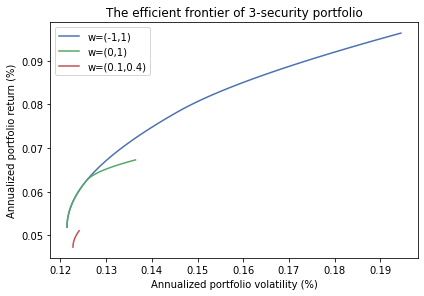

              Asset 1 Asset 2 Asset 3
Portfolio #39     XLB     XLU     XLV


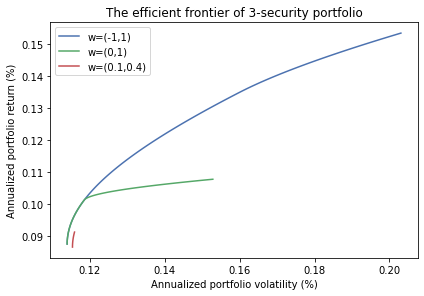

              Asset 1 Asset 2 Asset 3
Portfolio #40     XLB     XLU     XLY


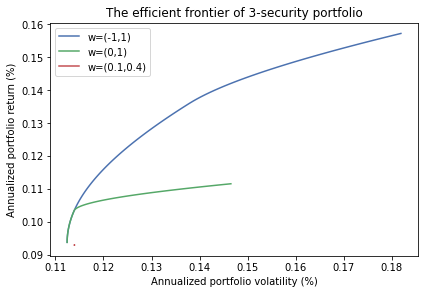

              Asset 1 Asset 2 Asset 3
Portfolio #41     XLB     XLU     VOX


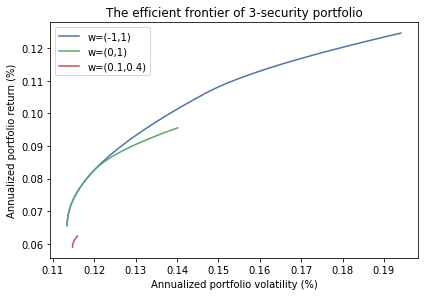

              Asset 1 Asset 2 Asset 3
Portfolio #42     XLB     XLV     XLY


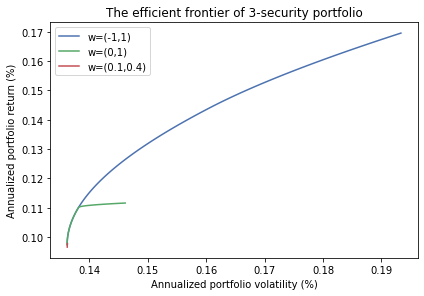

              Asset 1 Asset 2 Asset 3
Portfolio #43     XLB     XLV     VOX


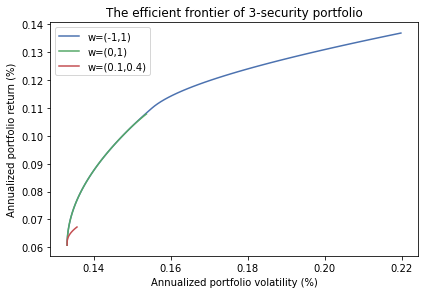

              Asset 1 Asset 2 Asset 3
Portfolio #44     XLB     XLY     VOX


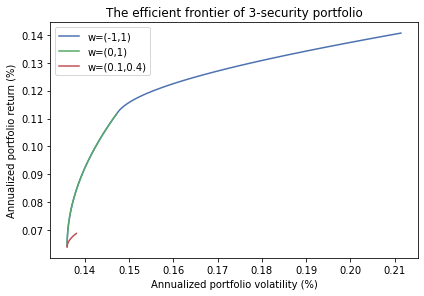

              Asset 1 Asset 2 Asset 3
Portfolio #45     XLE     XLF     XLI


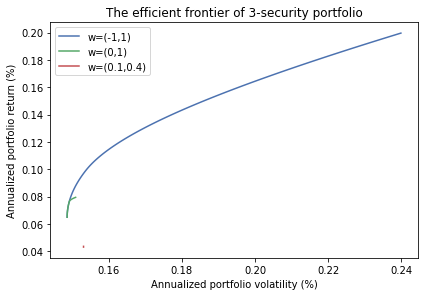

              Asset 1 Asset 2 Asset 3
Portfolio #46     XLE     XLF     XLK


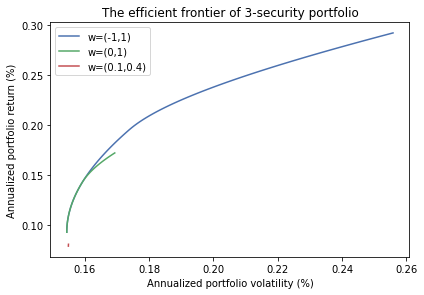

              Asset 1 Asset 2 Asset 3
Portfolio #47     XLE     XLF     XLP


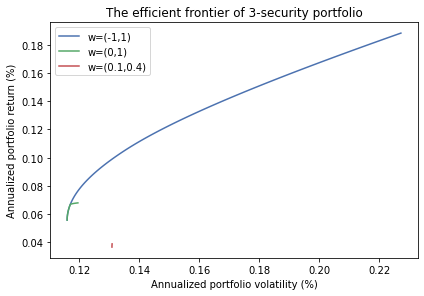

              Asset 1 Asset 2 Asset 3
Portfolio #48     XLE     XLF     IYR


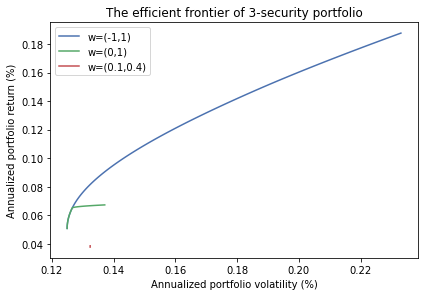

              Asset 1 Asset 2 Asset 3
Portfolio #49     XLE     XLF     XLU


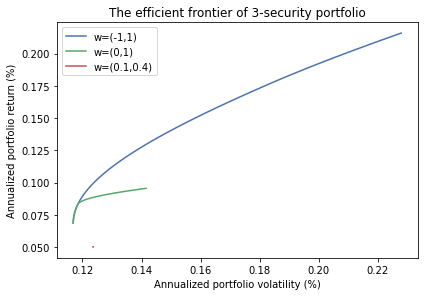

              Asset 1 Asset 2 Asset 3
Portfolio #50     XLE     XLF     XLV


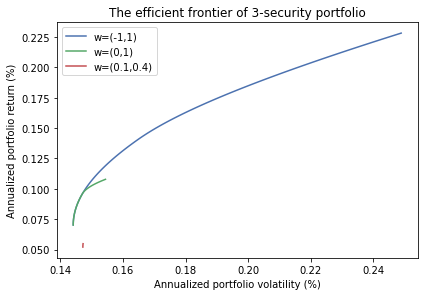

              Asset 1 Asset 2 Asset 3
Portfolio #51     XLE     XLF     XLY


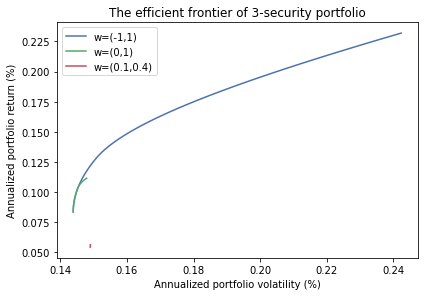

              Asset 1 Asset 2 Asset 3
Portfolio #52     XLE     XLF     VOX


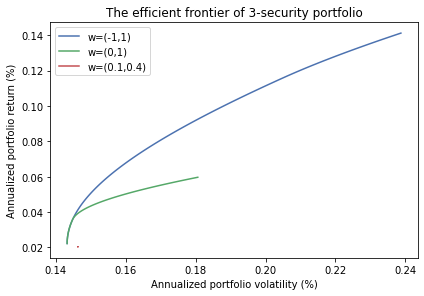

              Asset 1 Asset 2 Asset 3
Portfolio #53     XLE     XLI     XLK


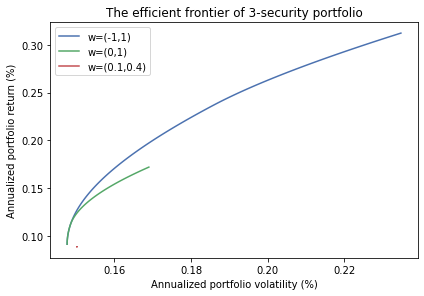

              Asset 1 Asset 2 Asset 3
Portfolio #54     XLE     XLI     XLP


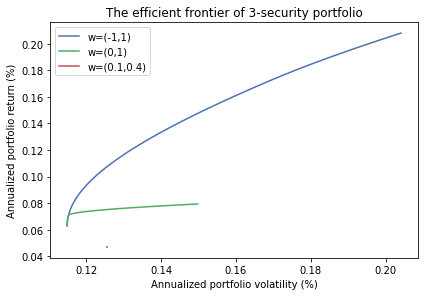

              Asset 1 Asset 2 Asset 3
Portfolio #55     XLE     XLI     IYR


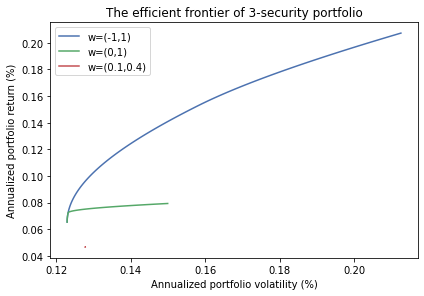

              Asset 1 Asset 2 Asset 3
Portfolio #56     XLE     XLI     XLU


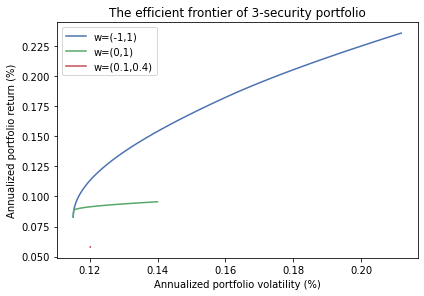

              Asset 1 Asset 2 Asset 3
Portfolio #57     XLE     XLI     XLV


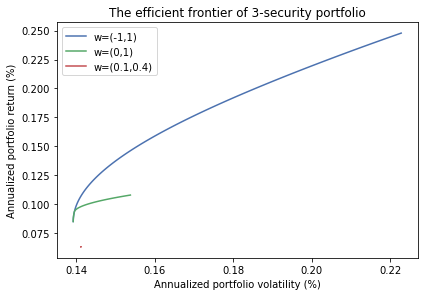

              Asset 1 Asset 2 Asset 3
Portfolio #58     XLE     XLI     XLY


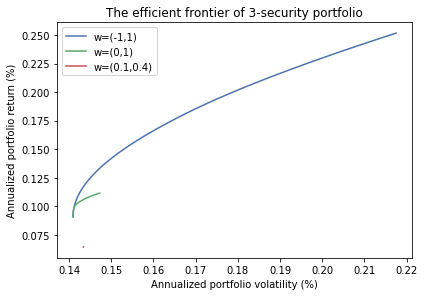

              Asset 1 Asset 2 Asset 3
Portfolio #59     XLE     XLI     VOX


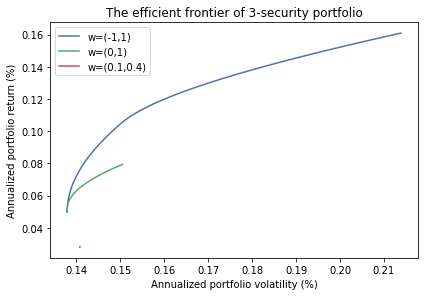

              Asset 1 Asset 2 Asset 3
Portfolio #60     XLE     XLK     XLP


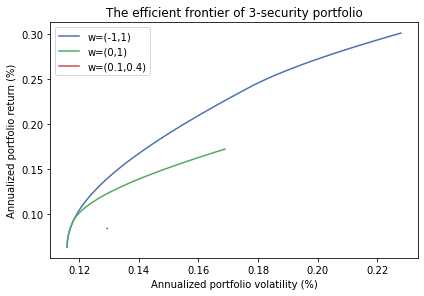

              Asset 1 Asset 2 Asset 3
Portfolio #61     XLE     XLK     IYR


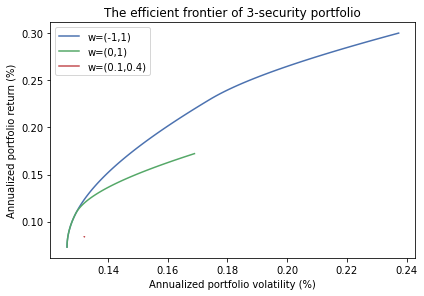

              Asset 1 Asset 2 Asset 3
Portfolio #62     XLE     XLK     XLU


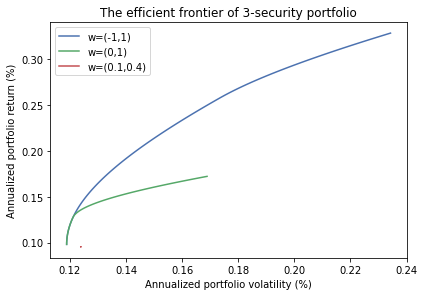

              Asset 1 Asset 2 Asset 3
Portfolio #63     XLE     XLK     XLV


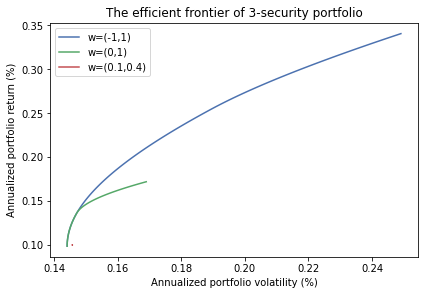

              Asset 1 Asset 2 Asset 3
Portfolio #64     XLE     XLK     XLY


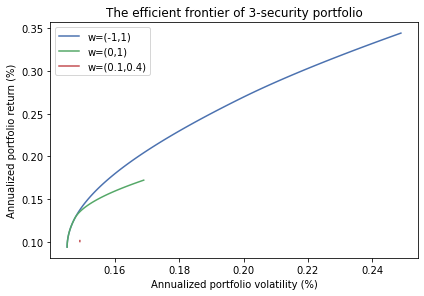

              Asset 1 Asset 2 Asset 3
Portfolio #65     XLE     XLK     VOX


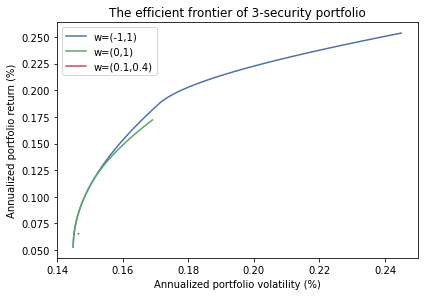

              Asset 1 Asset 2 Asset 3
Portfolio #66     XLE     XLP     IYR


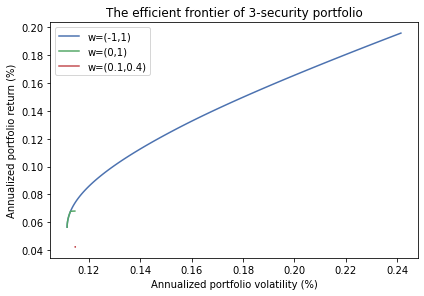

              Asset 1 Asset 2 Asset 3
Portfolio #67     XLE     XLP     XLU


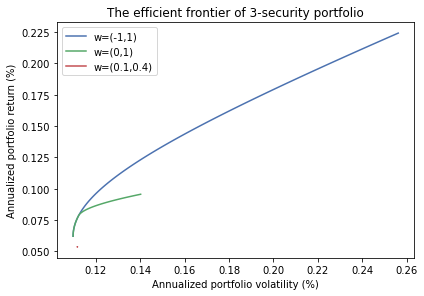

              Asset 1 Asset 2 Asset 3
Portfolio #68     XLE     XLP     XLV


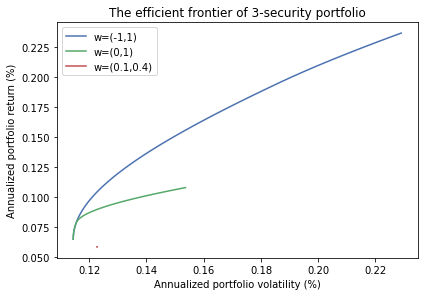

              Asset 1 Asset 2 Asset 3
Portfolio #69     XLE     XLP     XLY


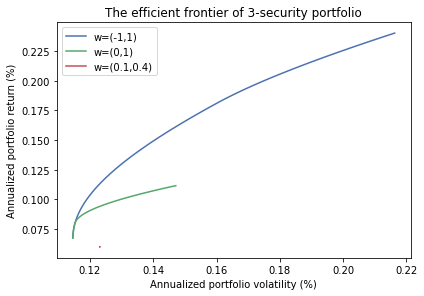

              Asset 1 Asset 2 Asset 3
Portfolio #70     XLE     XLP     VOX


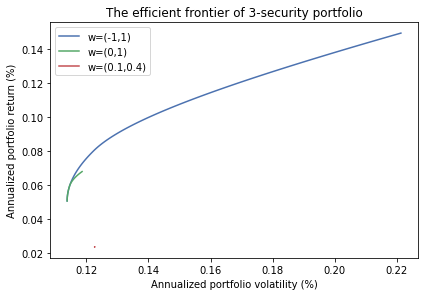

              Asset 1 Asset 2 Asset 3
Portfolio #71     XLE     IYR     XLU


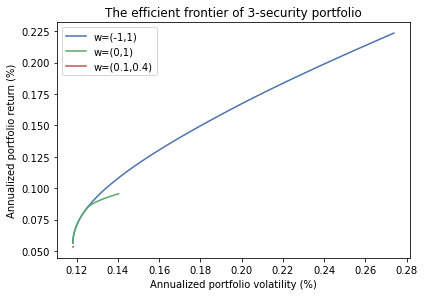

              Asset 1 Asset 2 Asset 3
Portfolio #72     XLE     IYR     XLV


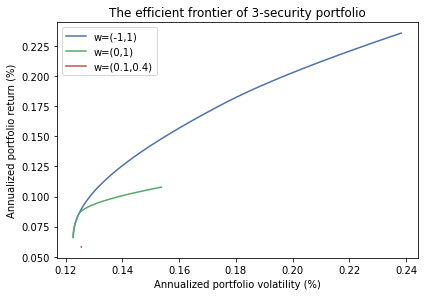

              Asset 1 Asset 2 Asset 3
Portfolio #73     XLE     IYR     XLY


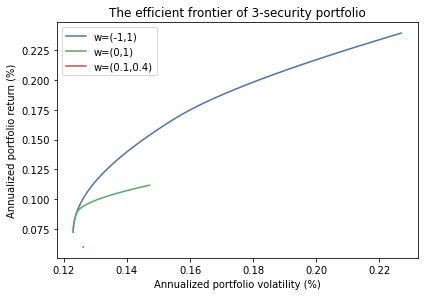

              Asset 1 Asset 2 Asset 3
Portfolio #74     XLE     IYR     VOX


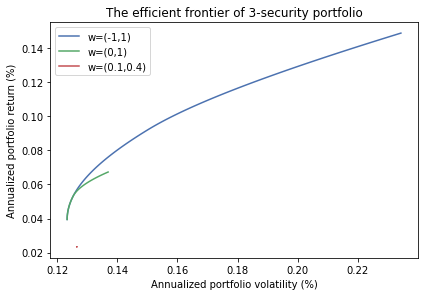

              Asset 1 Asset 2 Asset 3
Portfolio #75     XLE     XLU     XLV


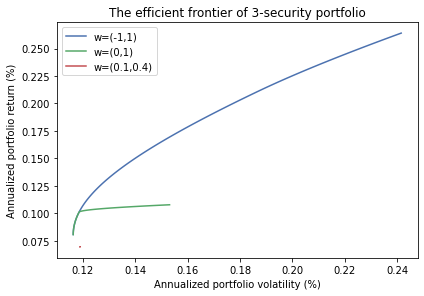

              Asset 1 Asset 2 Asset 3
Portfolio #76     XLE     XLU     XLY


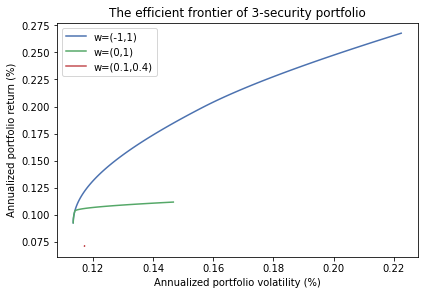

              Asset 1 Asset 2 Asset 3
Portfolio #77     XLE     XLU     VOX


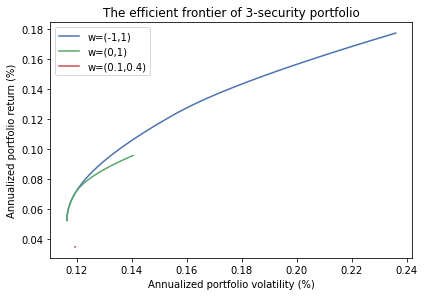

              Asset 1 Asset 2 Asset 3
Portfolio #78     XLE     XLV     XLY


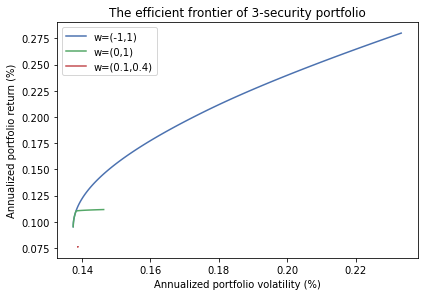

              Asset 1 Asset 2 Asset 3
Portfolio #79     XLE     XLV     VOX


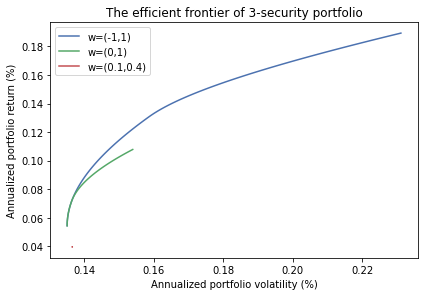

              Asset 1 Asset 2 Asset 3
Portfolio #80     XLE     XLY     VOX


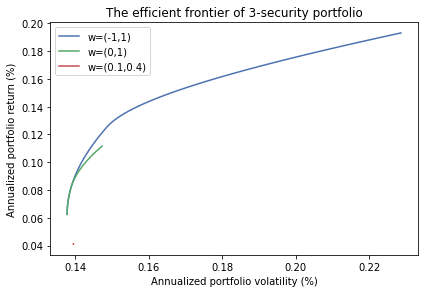

              Asset 1 Asset 2 Asset 3
Portfolio #81     XLF     XLI     XLK


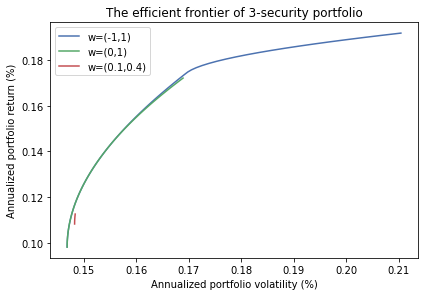

              Asset 1 Asset 2 Asset 3
Portfolio #82     XLF     XLI     XLP


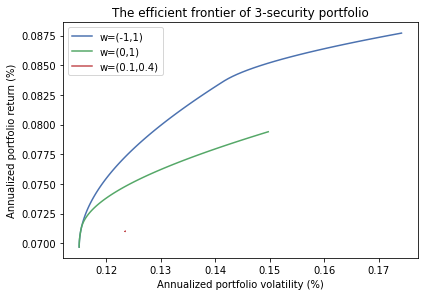

              Asset 1 Asset 2 Asset 3
Portfolio #83     XLF     XLI     IYR


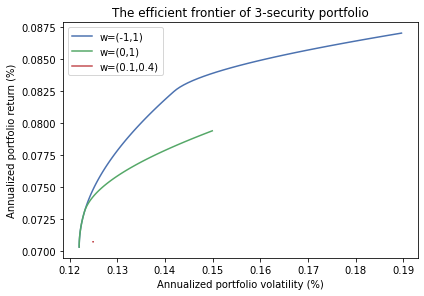

              Asset 1 Asset 2 Asset 3
Portfolio #84     XLF     XLI     XLU


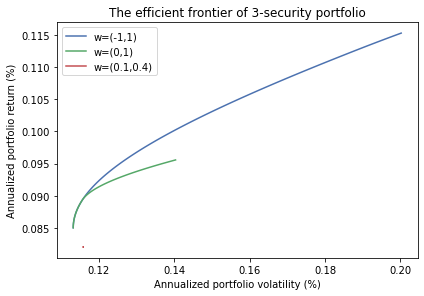

              Asset 1 Asset 2 Asset 3
Portfolio #85     XLF     XLI     XLV


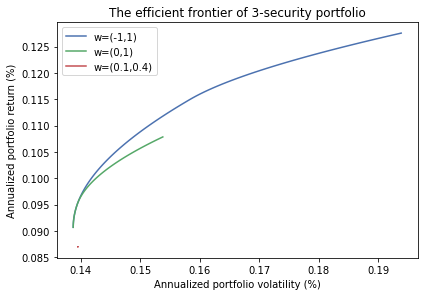

              Asset 1 Asset 2 Asset 3
Portfolio #86     XLF     XLI     XLY


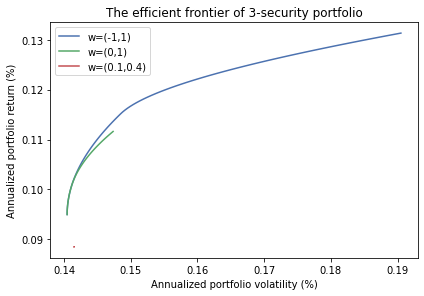

              Asset 1 Asset 2 Asset 3
Portfolio #87     XLF     XLI     VOX


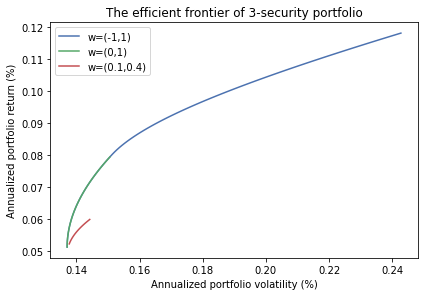

              Asset 1 Asset 2 Asset 3
Portfolio #88     XLF     XLK     XLP


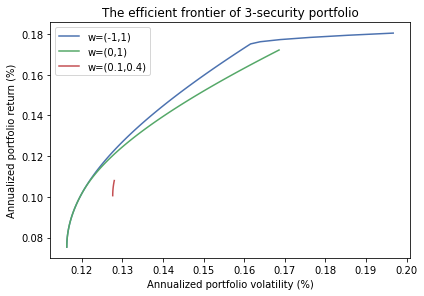

              Asset 1 Asset 2 Asset 3
Portfolio #89     XLF     XLK     IYR


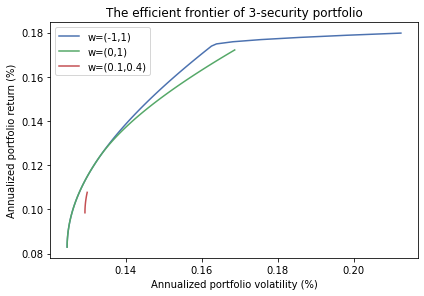

              Asset 1 Asset 2 Asset 3
Portfolio #90     XLF     XLK     XLU


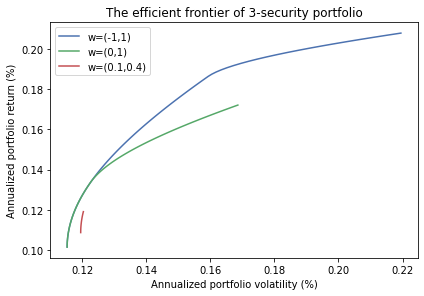

              Asset 1 Asset 2 Asset 3
Portfolio #91     XLF     XLK     XLV


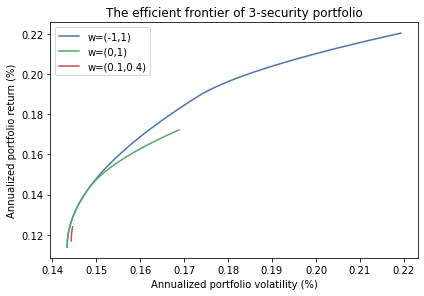

              Asset 1 Asset 2 Asset 3
Portfolio #92     XLF     XLK     XLY


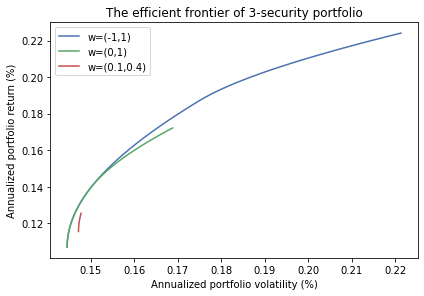

              Asset 1 Asset 2 Asset 3
Portfolio #93     XLF     XLK     VOX


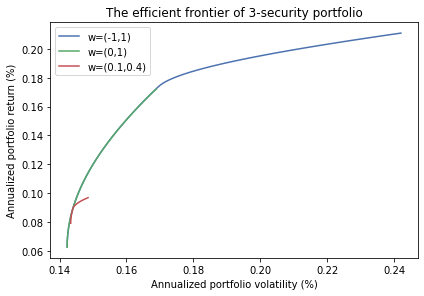

              Asset 1 Asset 2 Asset 3
Portfolio #94     XLF     XLP     IYR


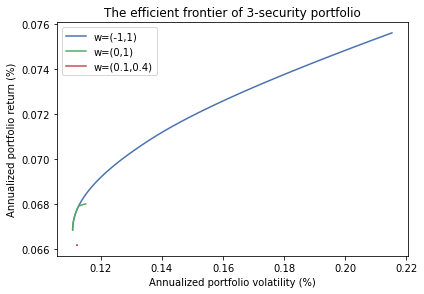

              Asset 1 Asset 2 Asset 3
Portfolio #95     XLF     XLP     XLU


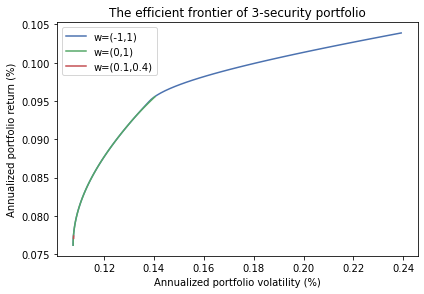

              Asset 1 Asset 2 Asset 3
Portfolio #96     XLF     XLP     XLV


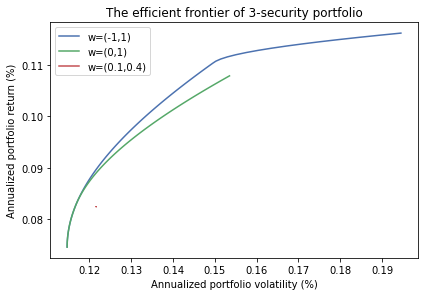

              Asset 1 Asset 2 Asset 3
Portfolio #97     XLF     XLP     XLY


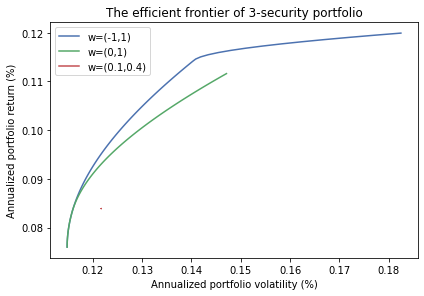

              Asset 1 Asset 2 Asset 3
Portfolio #98     XLF     XLP     VOX


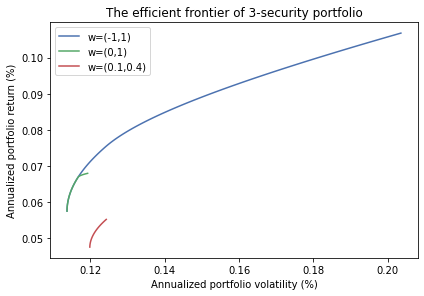

              Asset 1 Asset 2 Asset 3
Portfolio #99     XLF     IYR     XLU


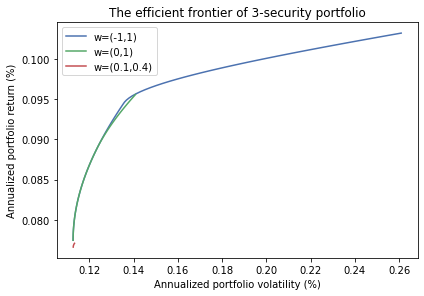

               Asset 1 Asset 2 Asset 3
Portfolio #100     XLF     IYR     XLV


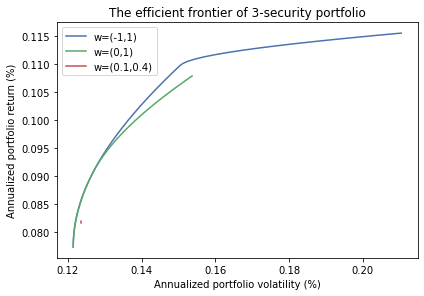

               Asset 1 Asset 2 Asset 3
Portfolio #101     XLF     IYR     XLY


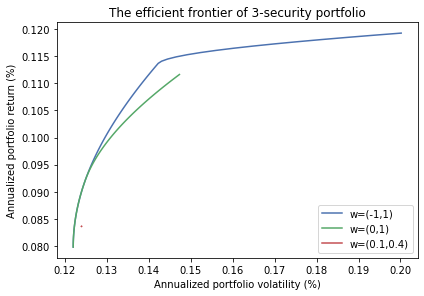

               Asset 1 Asset 2 Asset 3
Portfolio #102     XLF     IYR     VOX


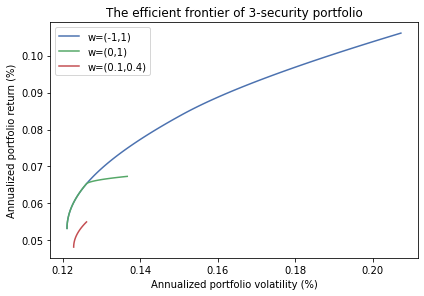

               Asset 1 Asset 2 Asset 3
Portfolio #103     XLF     XLU     XLV


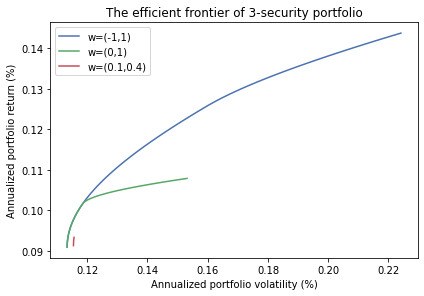

               Asset 1 Asset 2 Asset 3
Portfolio #104     XLF     XLU     XLY


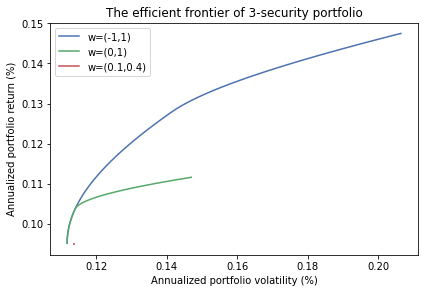

               Asset 1 Asset 2 Asset 3
Portfolio #105     XLF     XLU     VOX


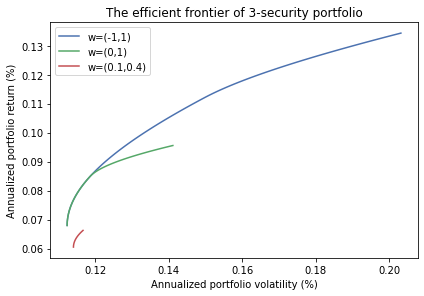

               Asset 1 Asset 2 Asset 3
Portfolio #106     XLF     XLV     XLY


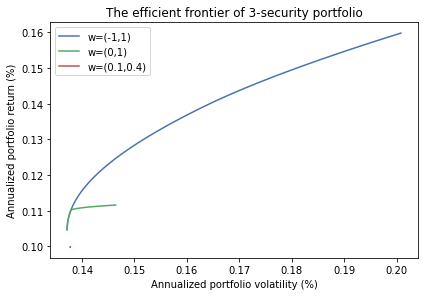

               Asset 1 Asset 2 Asset 3
Portfolio #107     XLF     XLV     VOX


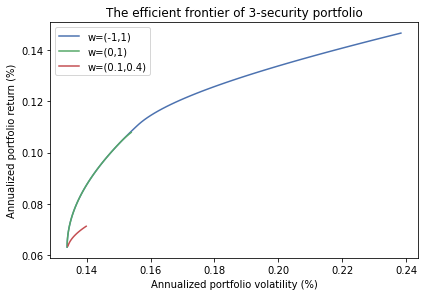

               Asset 1 Asset 2 Asset 3
Portfolio #108     XLF     XLY     VOX


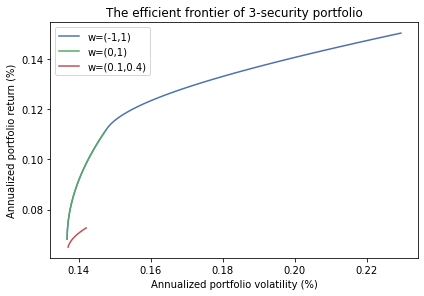

               Asset 1 Asset 2 Asset 3
Portfolio #109     XLI     XLK     XLP


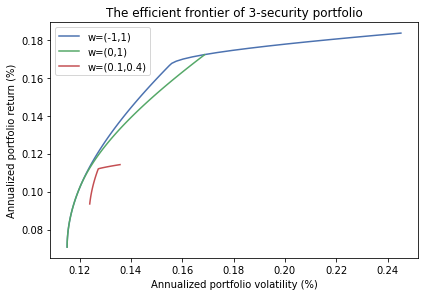

               Asset 1 Asset 2 Asset 3
Portfolio #110     XLI     XLK     IYR


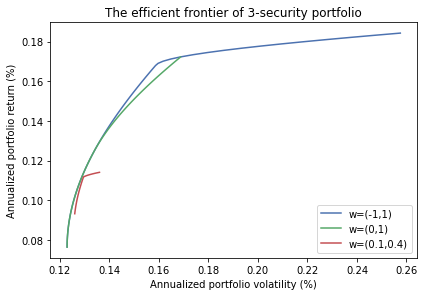

               Asset 1 Asset 2 Asset 3
Portfolio #111     XLI     XLK     XLU


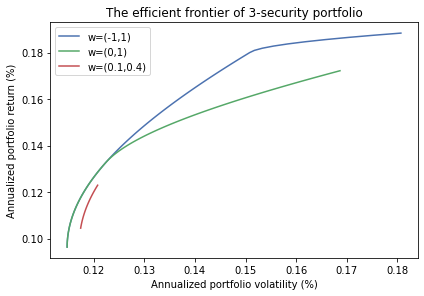

               Asset 1 Asset 2 Asset 3
Portfolio #112     XLI     XLK     XLV


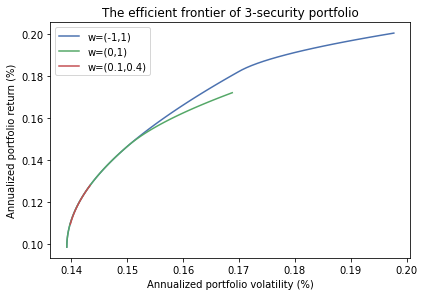

               Asset 1 Asset 2 Asset 3
Portfolio #113     XLI     XLK     XLY


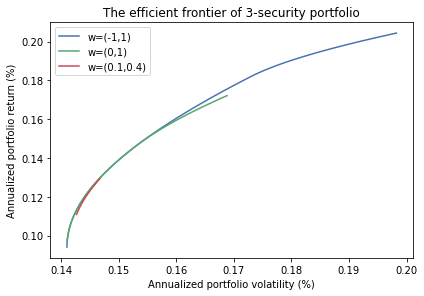

               Asset 1 Asset 2 Asset 3
Portfolio #114     XLI     XLK     VOX


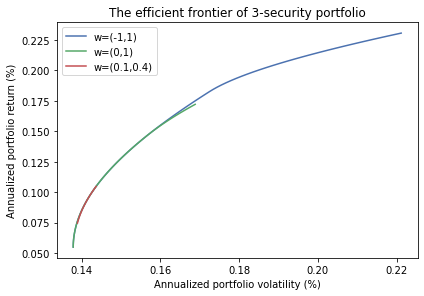

               Asset 1 Asset 2 Asset 3
Portfolio #115     XLI     XLP     IYR


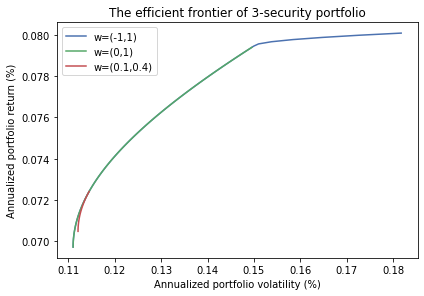

               Asset 1 Asset 2 Asset 3
Portfolio #116     XLI     XLP     XLU


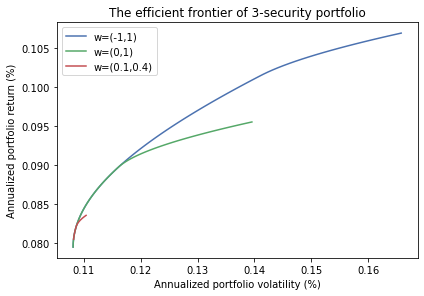

               Asset 1 Asset 2 Asset 3
Portfolio #117     XLI     XLP     XLV


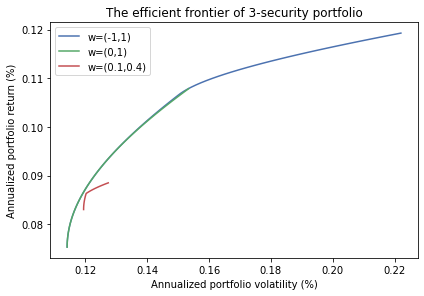

               Asset 1 Asset 2 Asset 3
Portfolio #118     XLI     XLP     XLY


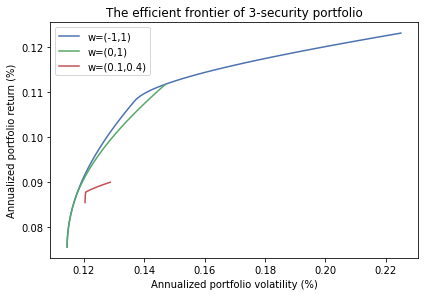

               Asset 1 Asset 2 Asset 3
Portfolio #119     XLI     XLP     VOX


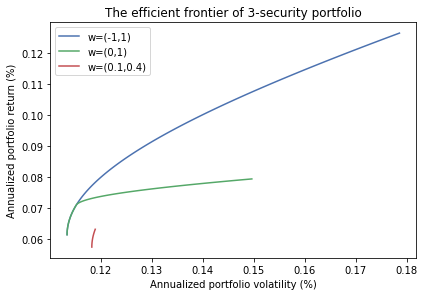

               Asset 1 Asset 2 Asset 3
Portfolio #120     XLI     IYR     XLU


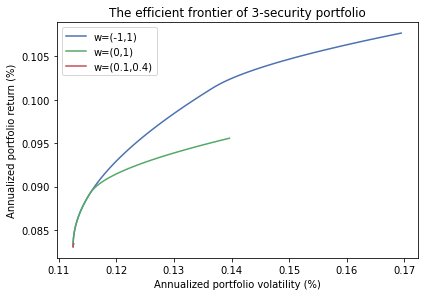

               Asset 1 Asset 2 Asset 3
Portfolio #121     XLI     IYR     XLV


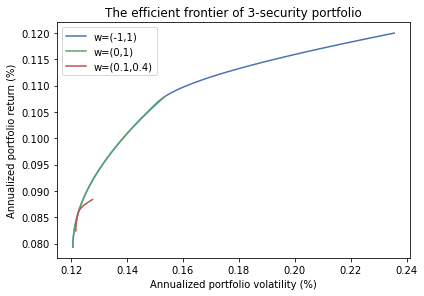

               Asset 1 Asset 2 Asset 3
Portfolio #122     XLI     IYR     XLY


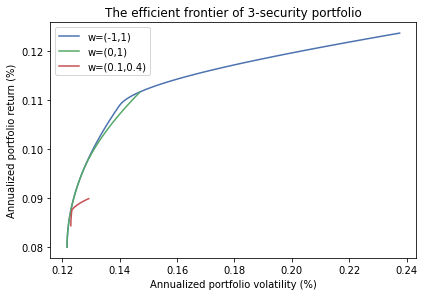

               Asset 1 Asset 2 Asset 3
Portfolio #123     XLI     IYR     VOX


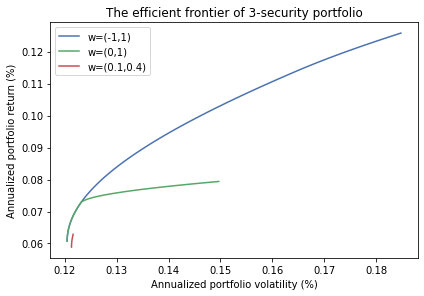

               Asset 1 Asset 2 Asset 3
Portfolio #124     XLI     XLU     XLV


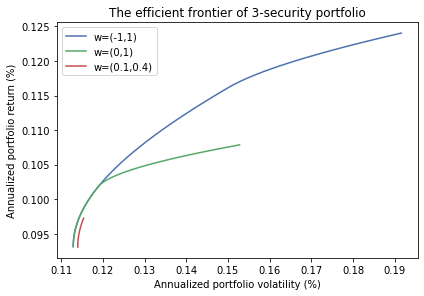

               Asset 1 Asset 2 Asset 3
Portfolio #125     XLI     XLU     XLY


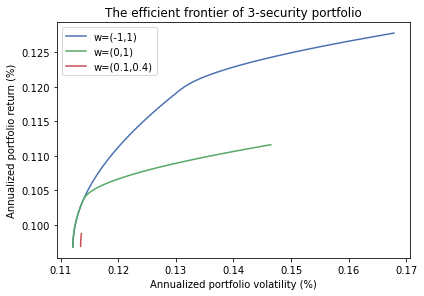

               Asset 1 Asset 2 Asset 3
Portfolio #126     XLI     XLU     VOX


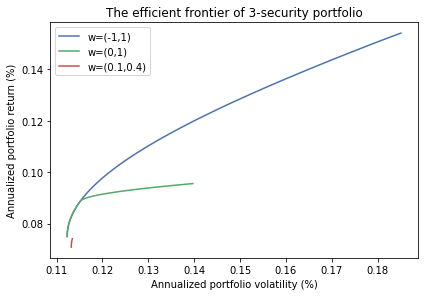

               Asset 1 Asset 2 Asset 3
Portfolio #127     XLI     XLV     XLY


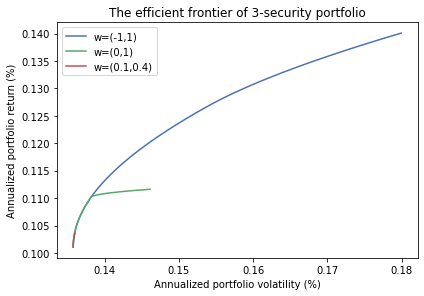

               Asset 1 Asset 2 Asset 3
Portfolio #128     XLI     XLV     VOX


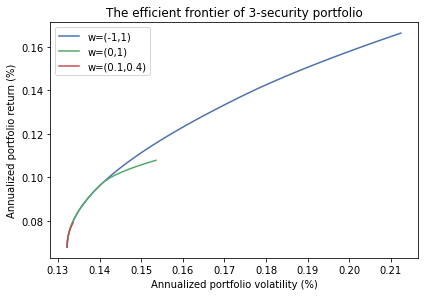

               Asset 1 Asset 2 Asset 3
Portfolio #129     XLI     XLY     VOX


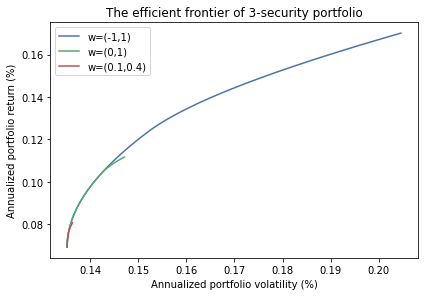

               Asset 1 Asset 2 Asset 3
Portfolio #130     XLK     XLP     IYR


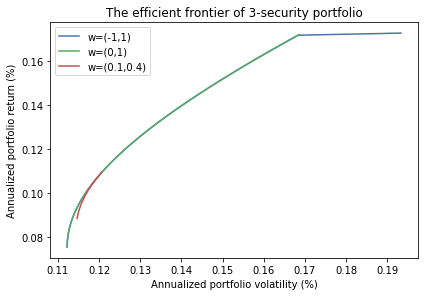

               Asset 1 Asset 2 Asset 3
Portfolio #131     XLK     XLP     XLU


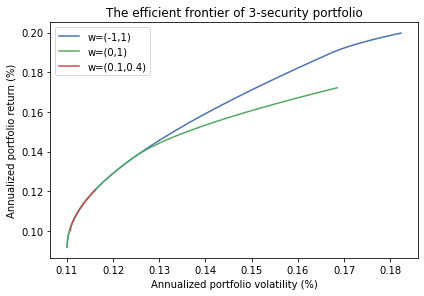

               Asset 1 Asset 2 Asset 3
Portfolio #132     XLK     XLP     XLV


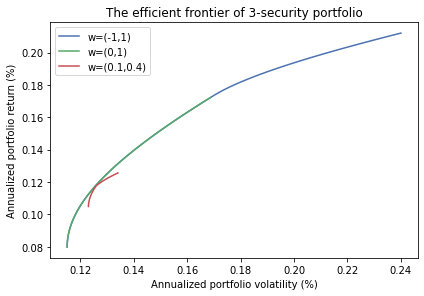

               Asset 1 Asset 2 Asset 3
Portfolio #133     XLK     XLP     XLY


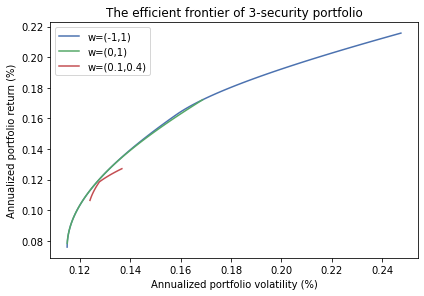

               Asset 1 Asset 2 Asset 3
Portfolio #134     XLK     XLP     VOX


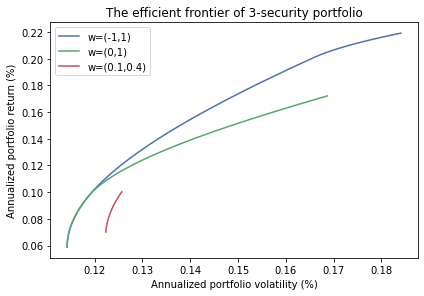

               Asset 1 Asset 2 Asset 3
Portfolio #135     XLK     IYR     XLU


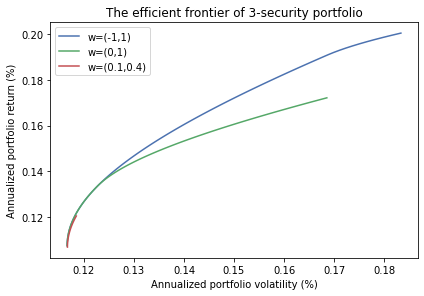

               Asset 1 Asset 2 Asset 3
Portfolio #136     XLK     IYR     XLV


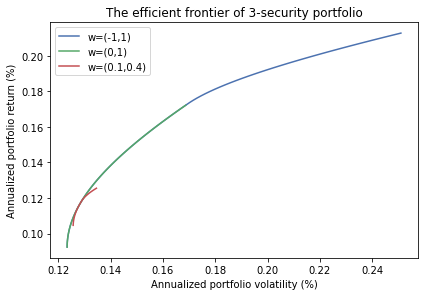

               Asset 1 Asset 2 Asset 3
Portfolio #137     XLK     IYR     XLY


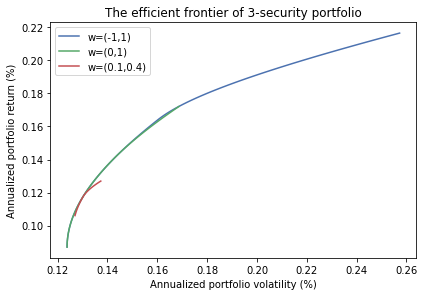

               Asset 1 Asset 2 Asset 3
Portfolio #138     XLK     IYR     VOX


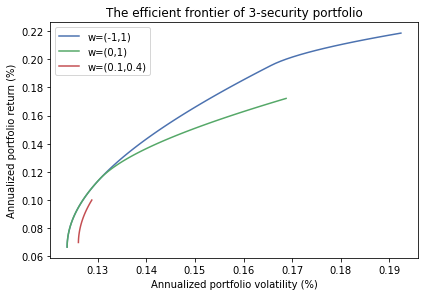

               Asset 1 Asset 2 Asset 3
Portfolio #139     XLK     XLU     XLV


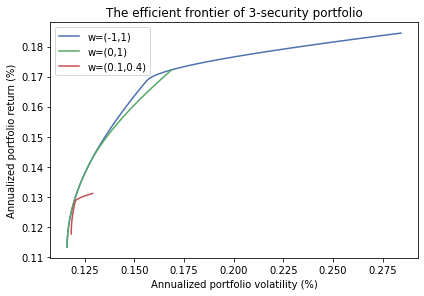

               Asset 1 Asset 2 Asset 3
Portfolio #140     XLK     XLU     XLY


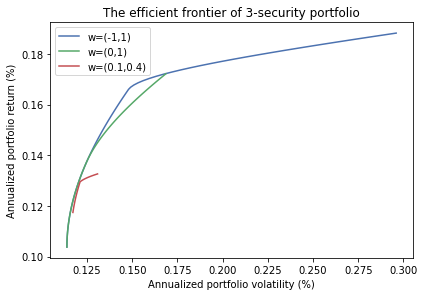

               Asset 1 Asset 2 Asset 3
Portfolio #141     XLK     XLU     VOX


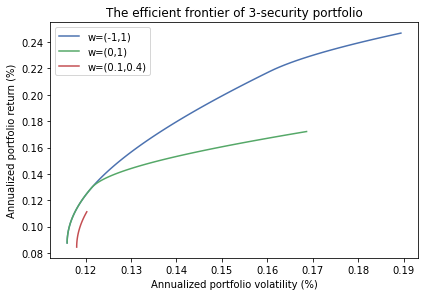

               Asset 1 Asset 2 Asset 3
Portfolio #142     XLK     XLV     XLY


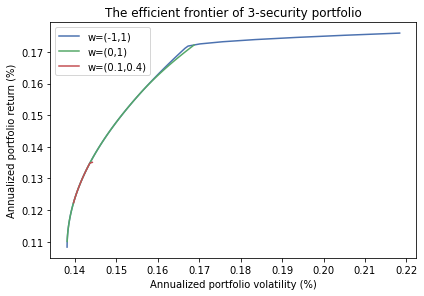

               Asset 1 Asset 2 Asset 3
Portfolio #143     XLK     XLV     VOX


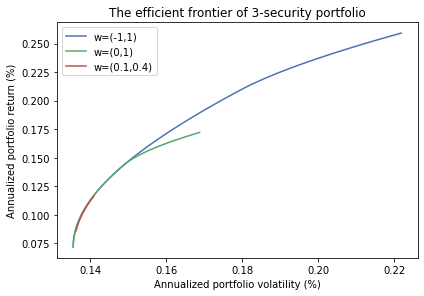

               Asset 1 Asset 2 Asset 3
Portfolio #144     XLK     XLY     VOX


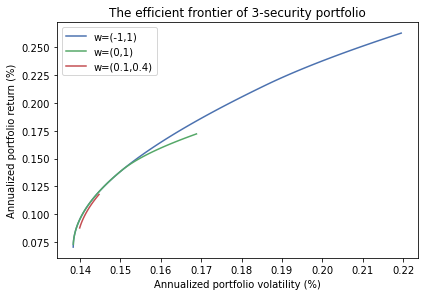

               Asset 1 Asset 2 Asset 3
Portfolio #145     XLP     IYR     XLU


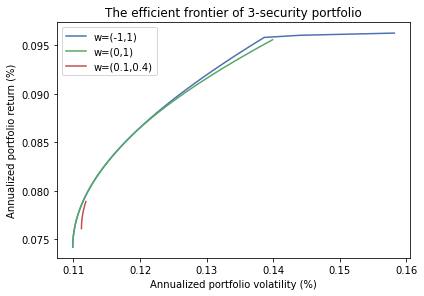

               Asset 1 Asset 2 Asset 3
Portfolio #146     XLP     IYR     XLV


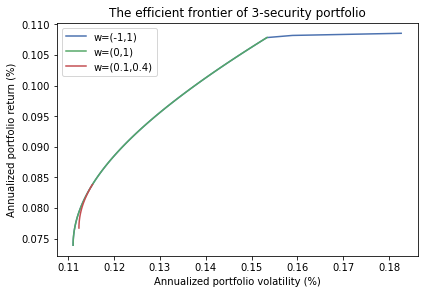

               Asset 1 Asset 2 Asset 3
Portfolio #147     XLP     IYR     XLY


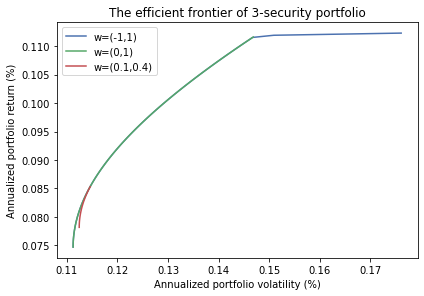

               Asset 1 Asset 2 Asset 3
Portfolio #148     XLP     IYR     VOX


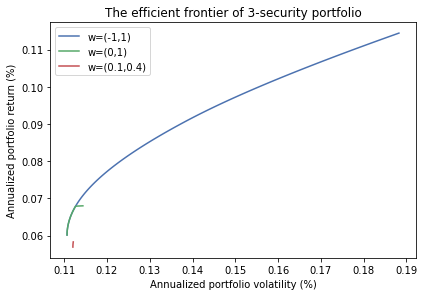

               Asset 1 Asset 2 Asset 3
Portfolio #149     XLP     XLU     XLV


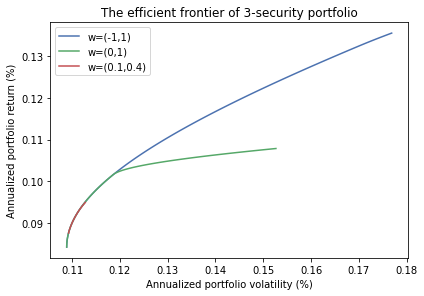

               Asset 1 Asset 2 Asset 3
Portfolio #150     XLP     XLU     XLY


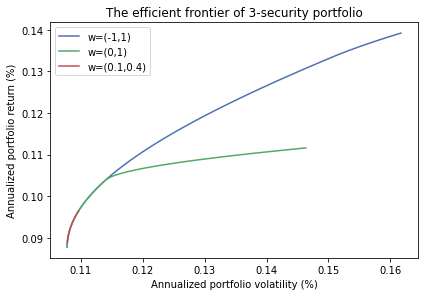

               Asset 1 Asset 2 Asset 3
Portfolio #151     XLP     XLU     VOX


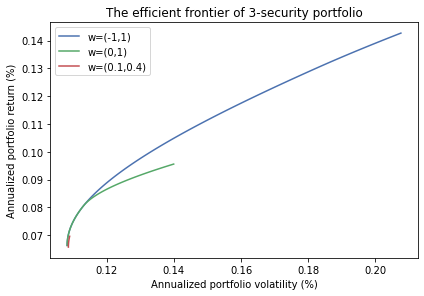

               Asset 1 Asset 2 Asset 3
Portfolio #152     XLP     XLV     XLY


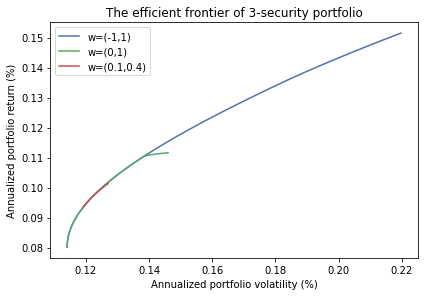

               Asset 1 Asset 2 Asset 3
Portfolio #153     XLP     XLV     VOX


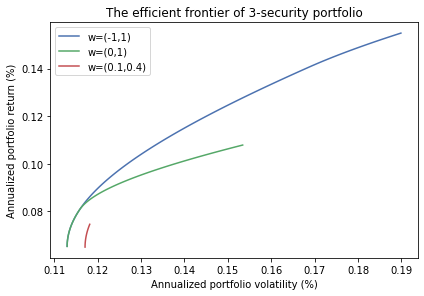

               Asset 1 Asset 2 Asset 3
Portfolio #154     XLP     XLY     VOX


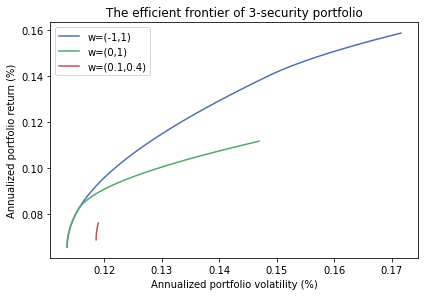

               Asset 1 Asset 2 Asset 3
Portfolio #155     IYR     XLU     XLV


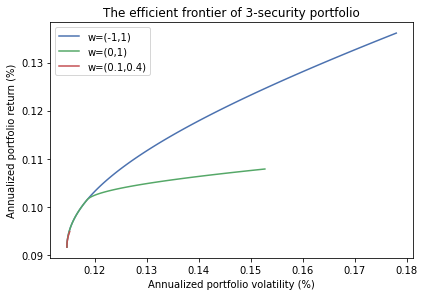

               Asset 1 Asset 2 Asset 3
Portfolio #156     IYR     XLU     XLY


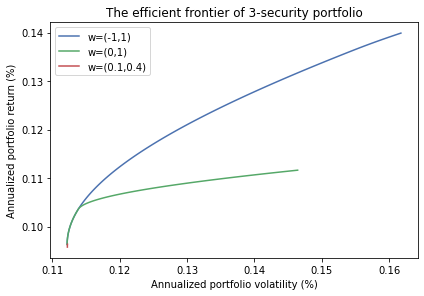

               Asset 1 Asset 2 Asset 3
Portfolio #157     IYR     XLU     VOX


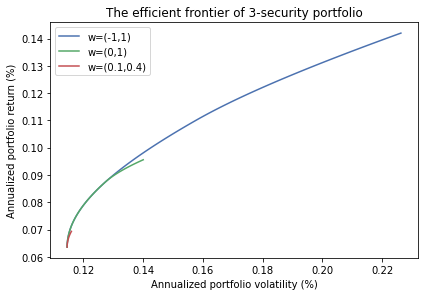

               Asset 1 Asset 2 Asset 3
Portfolio #158     IYR     XLV     XLY


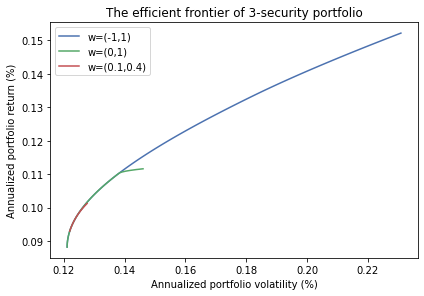

               Asset 1 Asset 2 Asset 3
Portfolio #159     IYR     XLV     VOX


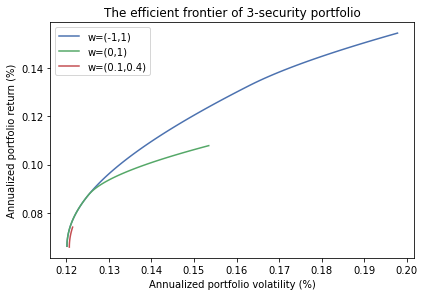

               Asset 1 Asset 2 Asset 3
Portfolio #160     IYR     XLY     VOX


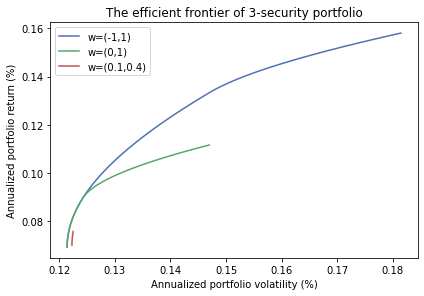

               Asset 1 Asset 2 Asset 3
Portfolio #161     XLU     XLV     XLY


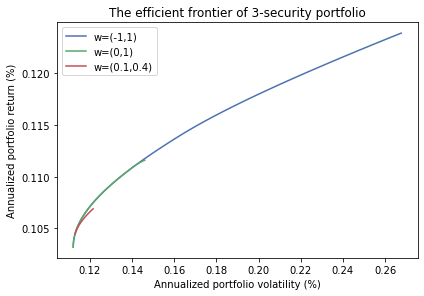

               Asset 1 Asset 2 Asset 3
Portfolio #162     XLU     XLV     VOX


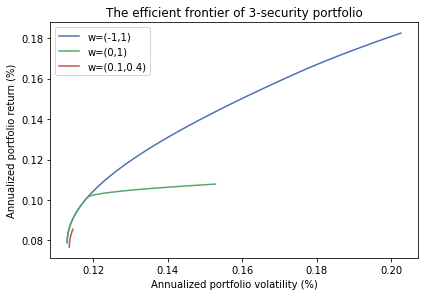

               Asset 1 Asset 2 Asset 3
Portfolio #163     XLU     XLY     VOX


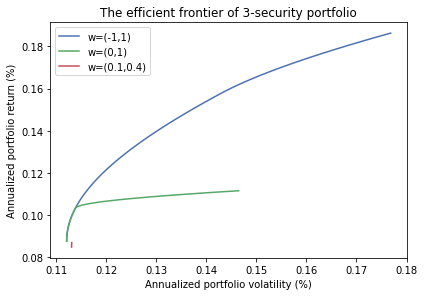

               Asset 1 Asset 2 Asset 3
Portfolio #164     XLV     XLY     VOX


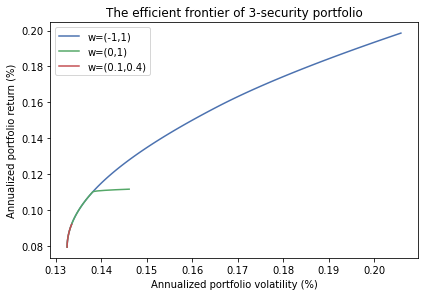

In [13]:
for j in (range(165)):
    mu = mean_historical_return(combinations_of_portfolios[j])
    S = CovarianceShrinkage(combinations_of_portfolios[j]).ledoit_wolf()
    ef_noc = EfficientFrontier(mu, S, weight_bounds=(-1,1))
    ef_long = EfficientFrontier(mu, S, weight_bounds=(0,1))
    ef_box = EfficientFrontier(mu, S, weight_bounds=(0.1,0.4))
    ef_box.set_weights(box_weights[j])
    
    fig, ax = plt.subplots(1,1)
    plotting.plot_efficient_frontier(ef_noc, ax=ax, show_assets=False)
    plotting.plot_efficient_frontier(ef_long, ax=ax, show_assets=False)
    plotting.plot_efficient_frontier(ef_box, ax=ax, show_assets=False)
    
    ax.set_ylabel("Annualized portfolio return (%)")
    ax.set_xlabel("Annualized portfolio volatility (%)")
    ax.legend(['w=(-1,1)','w=(0,1)','w=(0.1,0.4)'])
    print(portfolio_numbers_df.iloc[[j]])
    plt.title("The efficient frontier of 3-security portfolio")
    plt.show()

2.5	Discuss the impacts on the EF under constraints in detail.  Comment on capital requirements and fiduciary responsibilities associated with these constraints.

In the figures, we plot the efficient frontiers of the 3 Asset Portfolios for all combinations, 165 in total. Each portfolio comprises three assets, of which the weights are calculated by employing a mean-variance optimization python library, pyPortfolioOpt. 

To this end, we have considered three cases, where we imposed different box-constraints on the asset weights. 

The intervals of the considered box-constraints are (0,1), (-1,1), and (0.1,0.4). Among those, respectively, the first one allows for the weights to be between zero and one, which translates into a long-only portfolio. The second interval ranges from minus-one to one. As well as positive weights, allowing negative weights, this portfolio can also involve shorted assets. The third interval also represents a long-only portfolio, but within a more limited range compared to the first one. 

It is seen that, the min variance or optimal portfolio for most of the 165 portfolios under constraints (0,1), (-1,1), and (0.1,0.4) are very close to each, meaning for the same volatility we get almost the same return. There are a few exceptions for example under constraints w=(0.1,0.4) the portfolios: #8, #11, #13, #18, #24 and a few others, for the same volatility we get much lower return, as it can be seen on the plots.

Under no constraints w=(-1,1), as the volatility increases so as the return for all the 165 combinations, however it`s not the case for constraints w=(0,1), it seems for long only portfilios, if we increase the volatiltiy after a point the return does not increases, for example portfilio #0, #4, #5, #8, #18 and many others. 

This is sensible as the asset-weights are least constrained in this scenario, hence, giving the optimizer more options to produce better results. In line with this logic, for the same volatility returns are reduced with tighter intervals imposed on the weights. However, this does not mean that a portfolio with long and short assets are always better than a  long-only portfolio: Short sale accounts come along with margin requirements. Regulations require In addition to that, exchanges can enforce additional maintenance margin requirements after the sale. For example, NSE and Nasdaq require to have 100% of the current market value of the short sale in the trading account until the position is closed. This can result in margin calls. Brokerage firms can have further requirements, as well. If any of these requirements are not met, the brokerage firm has right to close the short position. 

On the other hand, long-only trades just require enough capital to buy the asset and pay he associated transaction costs at the beginning of the trade, thus require less capital.

Furthermore, as portfolio managers we are reuquired to fullfil our fiduciaries duties such as identifing the acceptable level of risk, expected return, and the suitable asset classes as well as informing our clients about these by provding them our investment policy. We also required to monitor the portfolios and review them periodically.